Hi, this is my final Project in dibimbing.id. My name is Novia Wulandari a data enthusiast who has just started my data learning journey by joining the bootcamp data science batch 17. This project is about making various kinds of machine learning that is suitable for use by dataset that can predict a customer will take a deposit or not. I got this Dataset Bank Marketing Analysis from Kaggle (https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset)

Overall Steps:

* Import all Libraries & Load the Dataset
* Split Data (Train and test)
* Exploratory Data Analysis (EDA) categorical data and numrical data
* Removing redundant variable based on business value
* Data Preparation: Data Train
  * Drop duplicated data
  * Outliers analysis
  * Removing outliers
  * Missing value handling
* Data Preparation: Data Test
  * Drop duplicated data
  * Outliers analysis
  * Removing outliers
  * Missing value handling
* Split data into Xtrain, ytrain, Xtest, ytest
* Chi-Square test
* Encoding preparation
* Encode separately for data train and data test
* Split Xtrain and Xtest into different categories
* Standar Scaller
* Modelling Classification ML algorithms:
  * Logistic Regression
  * K-Nearest Neighbor (KNN)
  * Naive Bayes
  * Support Vector Machine (SVM)
  * Tree Based
    * Decision Tree
    * Random Forest
    * XGBoost
* Evaluation Model
  * Learning curve Regression
  * Learning curve K-Nearest Neighbor (KNN)
  * Learning curve Naive Bayes
  * Learning curve Support Vector Machine (SVM)
  * Learning curve Decision Tree
  * Learning curve Random Forest
  * Learning curve XGBoost
* Tuning Model
  * Tuning Model Logistic Regression Model with GridSearch and RandomSearch
  * Tuning Model SVM Model with GridSearch and RandomSearch
  * Tuning Model Naive Bayes Model with GridSearch and RandomSearch
* Feature Importance with Dalex

Thank You in Advance!

## Import Libraries

In [1]:
#import linear algebra and data manipulation libraries
import pandas as pd
import numpy as np
#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy import stats
import warnings
import random
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
#import for split 
from sklearn.model_selection import train_test_split
#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
%pip install scikit-plot
#import scikitplot as skplt

# Attribute Information:

I got this from: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Input variables:
# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') social and economic context attributes
16. balance - client’s average yearly balance, in euros (numeric) 
17. Deposit - has the client subscribed a term deposit? (binary: 'yes','no')

## A. Data Understanding

In [2]:
df_bank = pd.read_csv("bank.csv")
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df_bank.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
10097,38,management,married,unknown,no,1349,yes,no,unknown,6,may,100,1,-1,0,unknown,no
3808,56,services,married,secondary,no,1989,no,no,cellular,3,aug,279,4,181,4,success,yes
852,48,management,single,tertiary,no,830,no,no,cellular,25,aug,961,4,-1,0,unknown,yes
2567,22,student,single,tertiary,no,691,no,no,cellular,19,aug,338,1,-1,0,unknown,yes
7241,31,blue-collar,married,secondary,no,557,yes,yes,unknown,27,may,185,1,-1,0,unknown,no
8318,37,management,married,tertiary,no,1125,yes,no,unknown,3,jun,301,1,-1,0,unknown,no
4984,35,management,divorced,tertiary,no,6997,yes,no,cellular,9,jul,1121,1,-1,0,unknown,yes
9785,48,self-employed,married,secondary,no,91,no,no,cellular,21,aug,136,8,-1,0,unknown,no
5853,30,management,single,tertiary,no,265,no,no,cellular,25,nov,295,1,93,3,success,no
6078,33,blue-collar,married,secondary,yes,2,no,no,unknown,23,may,74,4,-1,0,unknown,no


In [4]:
df_bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [5]:
5289/(5289+5873)
#almost balanced

0.4738398136534671

### Split Data (Train & Test)

In [6]:
#Copy data bank
X = df_bank.copy()
# Splitting to avoid data leakage (train : test = 80% : 20%)
train , test = train_test_split(X,train_size=0.8, random_state=42,stratify=X.deposit) #stratify to the target column 

In [7]:
train["deposit"].value_counts()

no     4698
yes    4231
Name: deposit, dtype: int64

In [8]:
#Calculate percentage "yes"
4231/(4231+4698)

0.47384925523574867

In [9]:
test["deposit"].value_counts()

no     1175
yes    1058
Name: deposit, dtype: int64

In [10]:
#Calculate percentage "yes"
1058/(1058+1175)

0.4738020600089566

In [11]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### Exploratory Data Analysis (EDA)

#### Identify numerical and categorical data

In [12]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Based on the displayed result above
1. Categorical Data : the datatype of job, marital, education, default, housing, loan, contact, month, poutcome are object.

2. Numerical Data : Age, balance, day, duration, campaign, pdays, previous are int64, it means that they are numerical variables.

#### Heatmap Correlation
#### For case classification it is optional because you don't want to check VIF or multicollinearity (in regression)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\2380921244.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bank.corr(),annot = True)


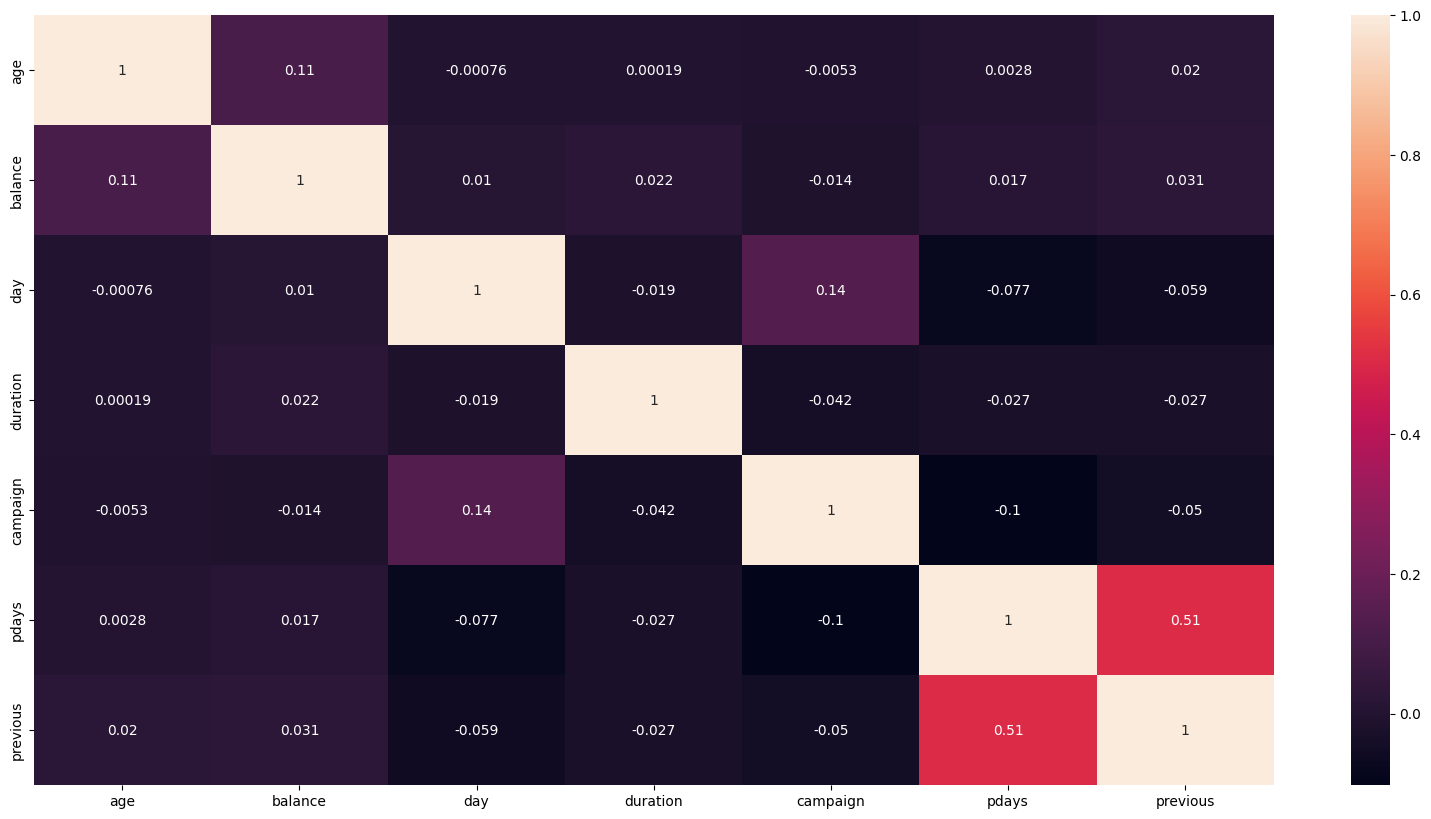

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df_bank.corr(),annot = True)
plt.show()

#### Pearson Correlation Coefficient
From the graph above, it seems like nothing highly correlated as most of the values is below 0.5. 1 means is correlated while 0 means no correlation. There is no correlation, no relationship between the independent variables.So, it is good practice to check it before selecting the variables into the regression model since is one of the steps to avoid overfitting. Correlation matrix: (0<=|c|<0.3: weak), (0.3<=|c|<0.7: moderate) & (0.7<=|c|<1: strong). In classification it's must not.

### Exploratory Data Analysis : Categorical Data

In [15]:
def categorical_data(title):
    plt.figure(figsize=(17,8))
    
    # calculate proportion values for each category
    prop_df = df_bank.groupby([title, 'deposit']).size().reset_index(name='count')
    prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())
    
    g=sns.catplot(x=title, y='prop', kind='bar', hue='deposit', palette='viridis', data=prop_df, height=8.27, aspect=11.7/8.27)
    #displays the value of each barplot
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2., 
            p.get_height(), 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large', ha='center')
    plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

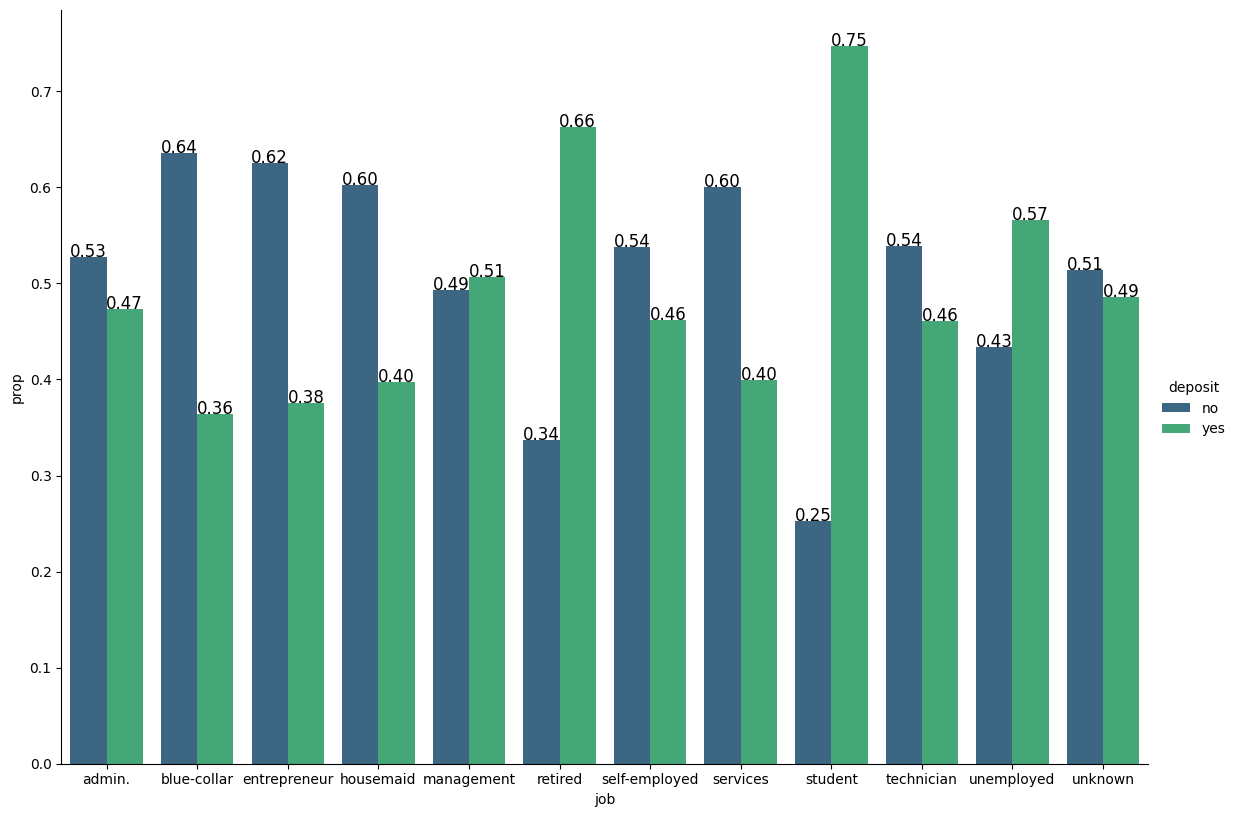

In [16]:
categorical_data("job")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

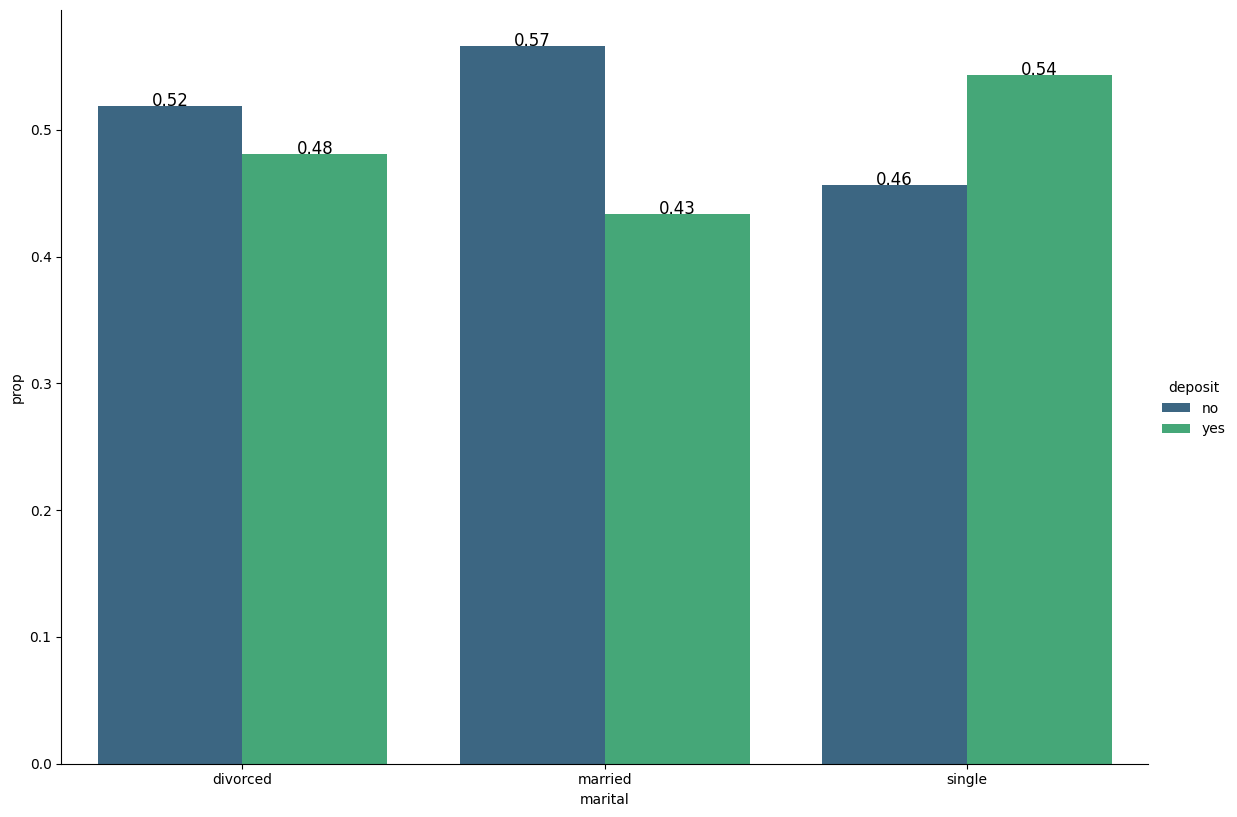

In [17]:
categorical_data("marital")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

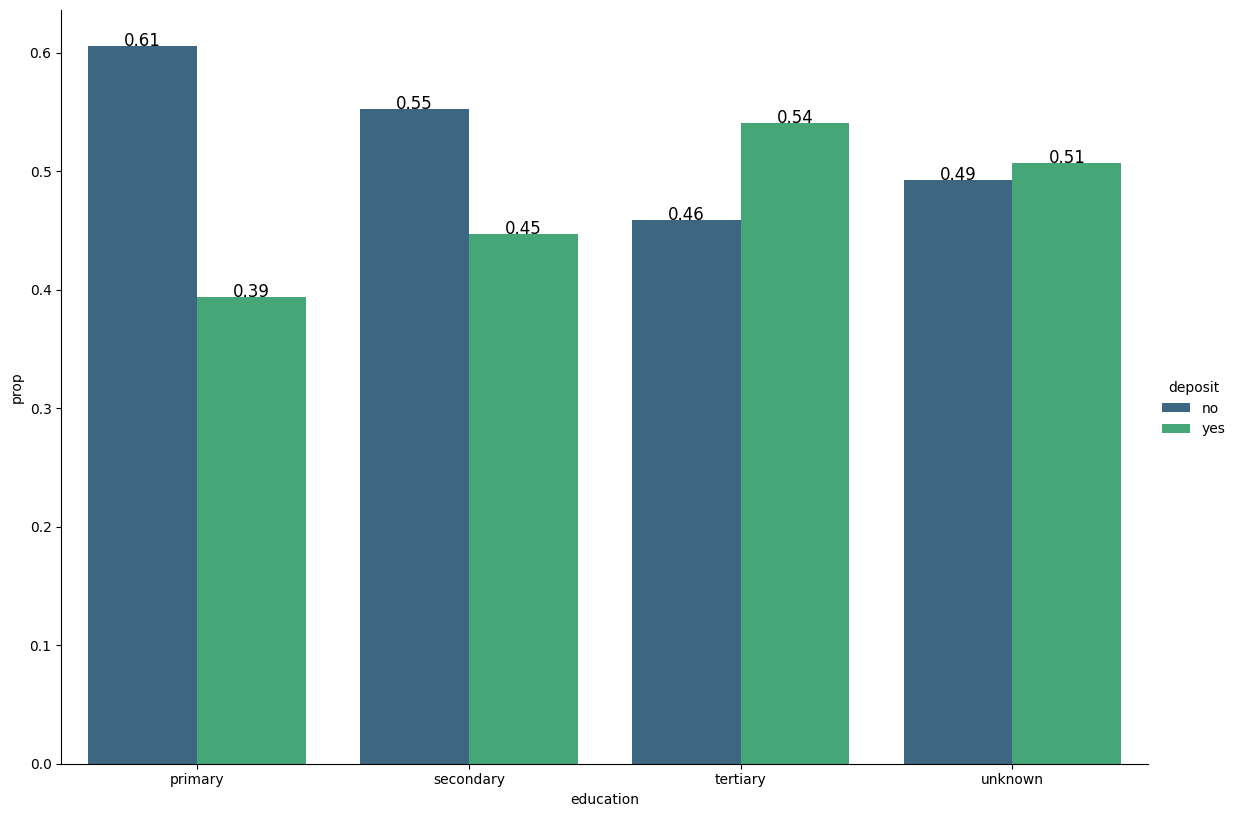

In [18]:
categorical_data("education")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

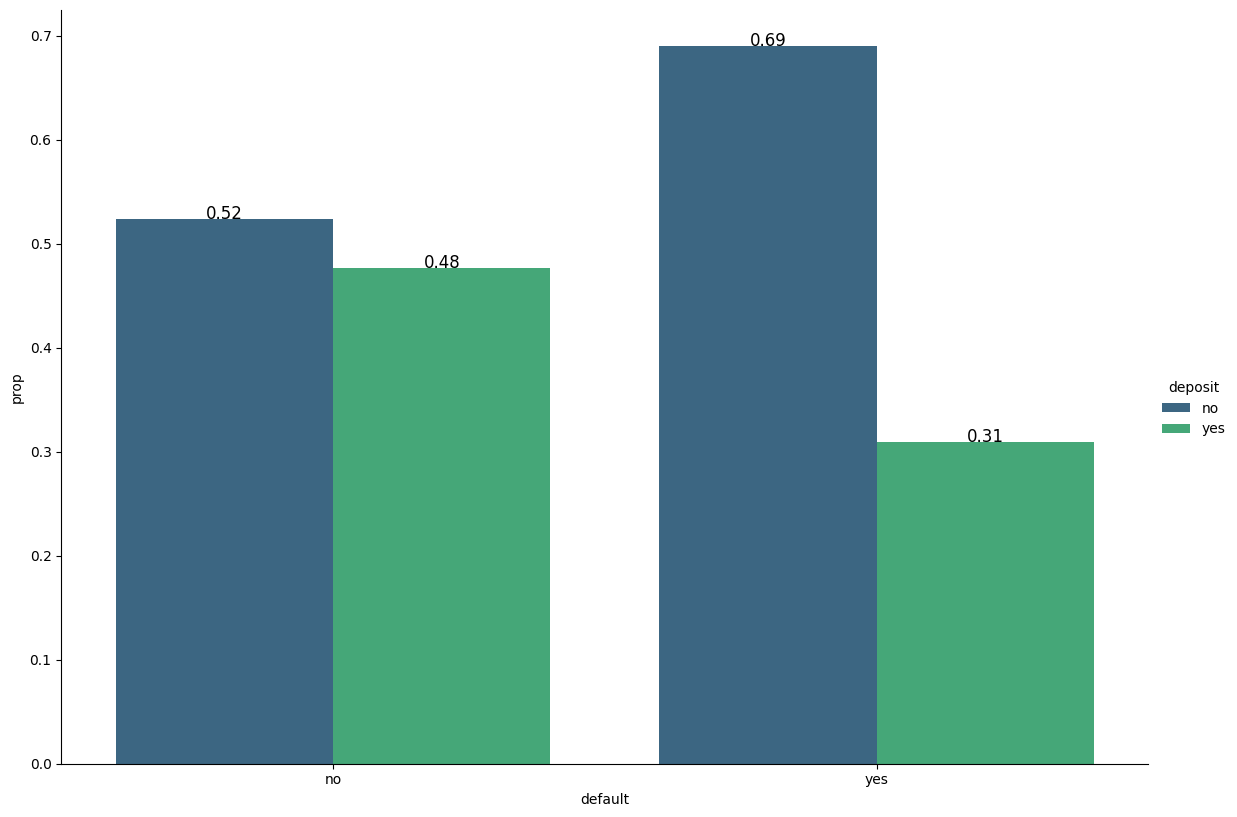

In [19]:
categorical_data("default")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

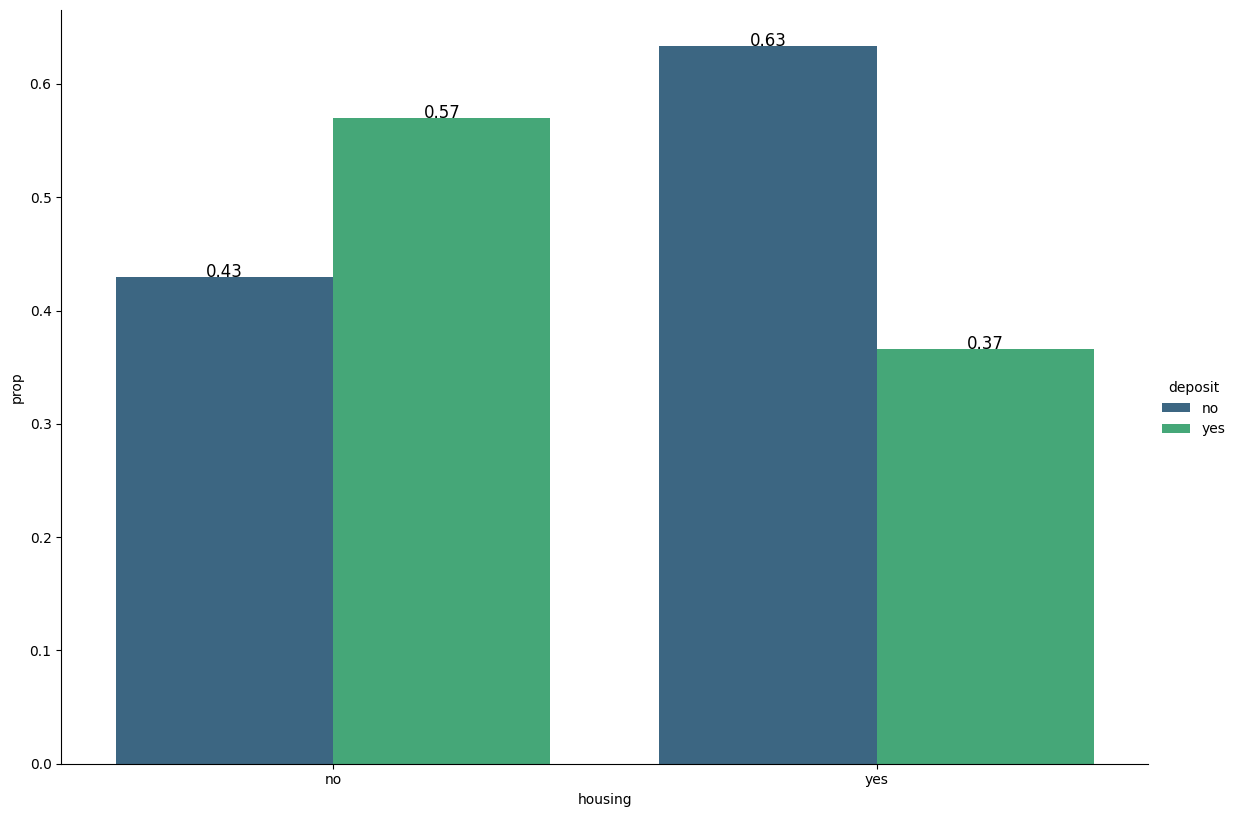

In [20]:
categorical_data("housing")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

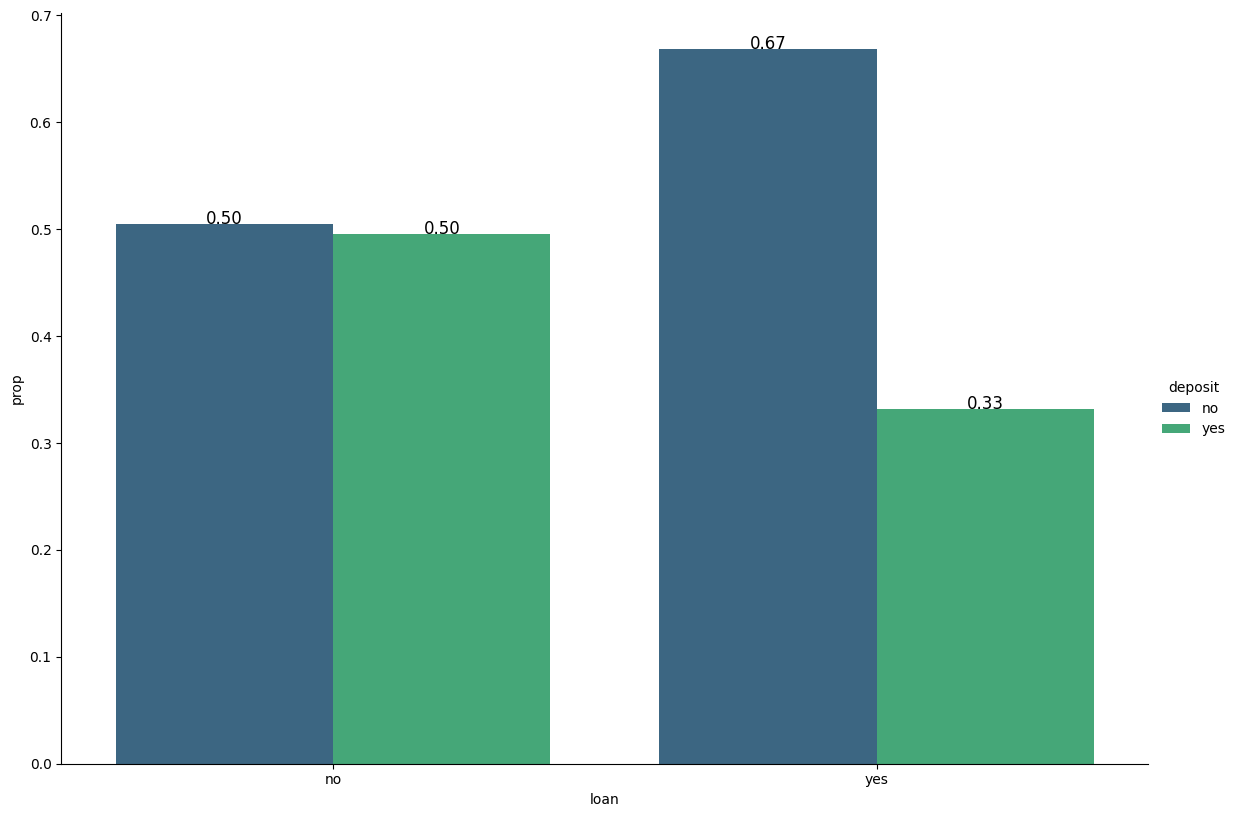

In [21]:
categorical_data("loan")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

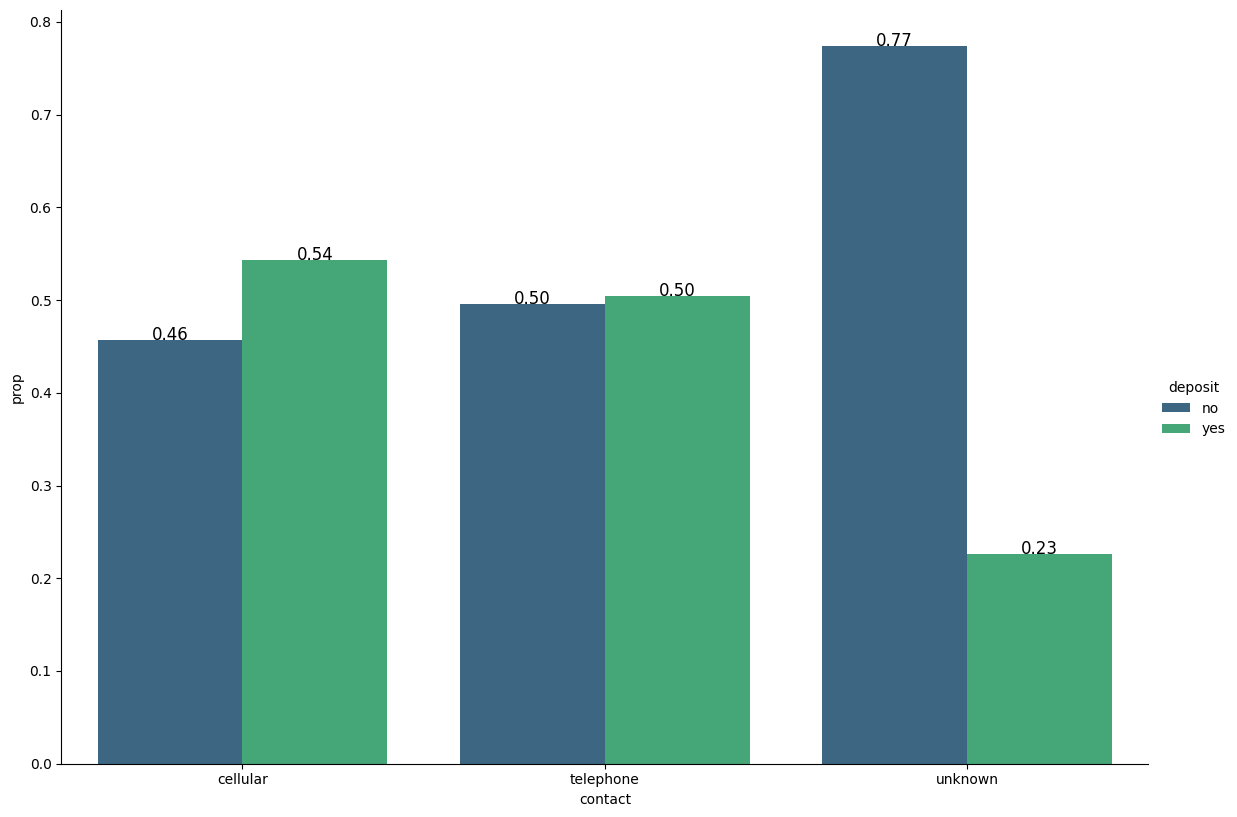

In [22]:
categorical_data("contact")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

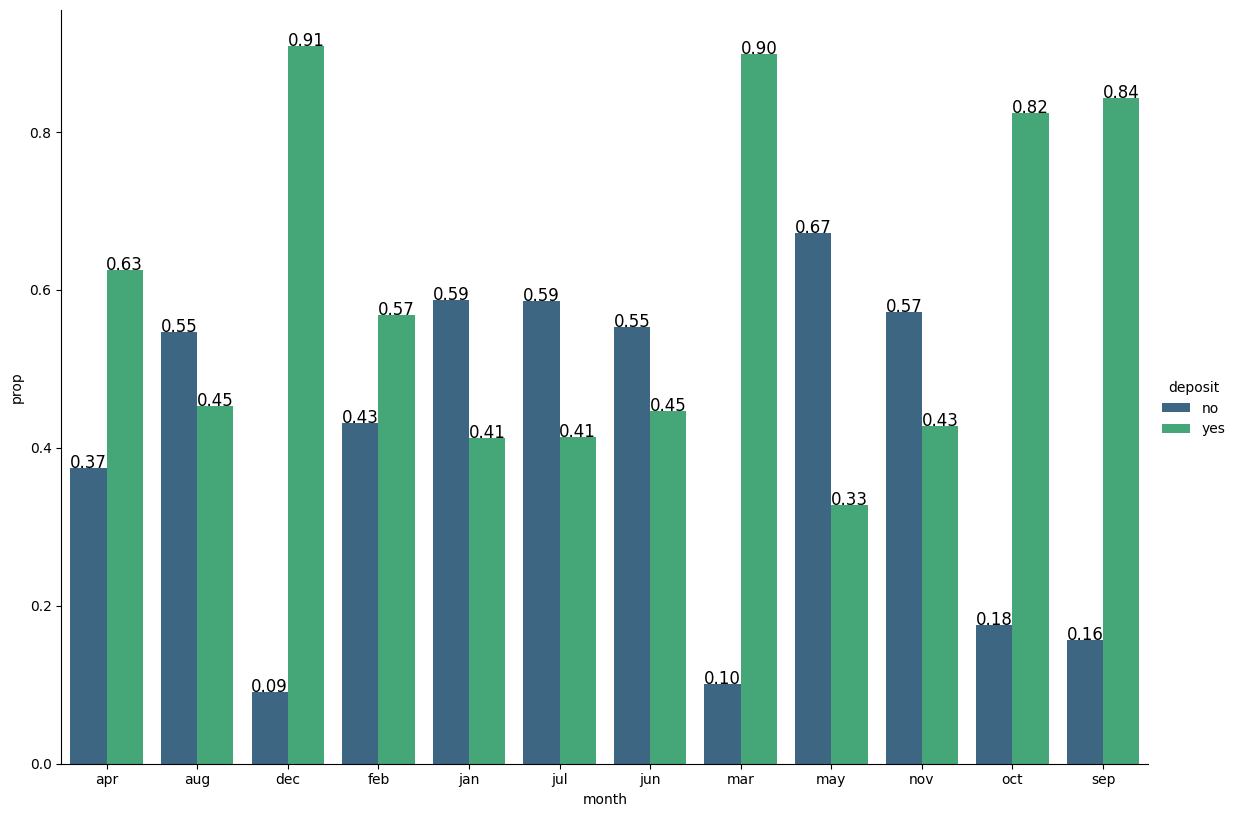

In [23]:
categorical_data("month")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5928\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

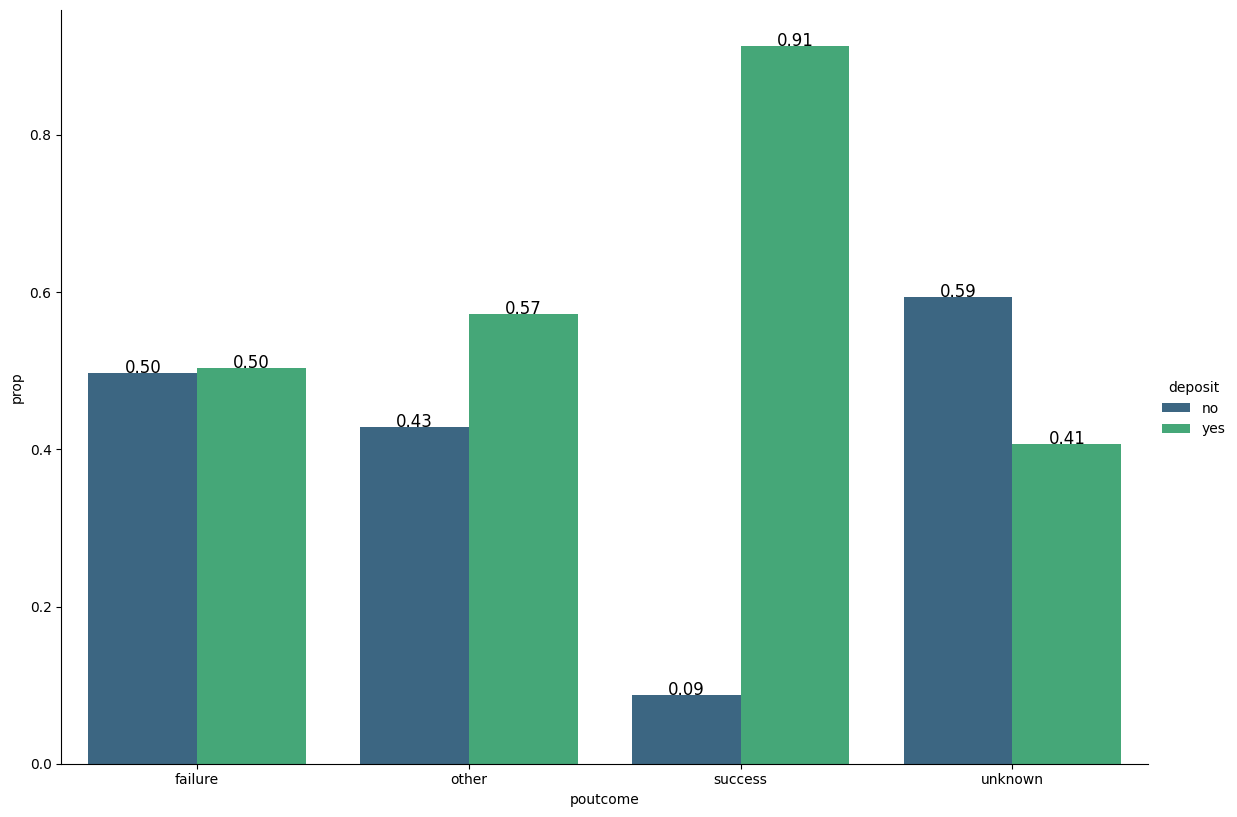

In [24]:
categorical_data("poutcome")

### Exploratory Data Analysis : Numerical Data

In [25]:
# desciptive analysis for numerical columns
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [26]:
def dist_bivariate(title):
    sns.FacetGrid(df_bank,hue='deposit',palette='cubehelix').map(sns.distplot,title).add_legend()
    plt.show()

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


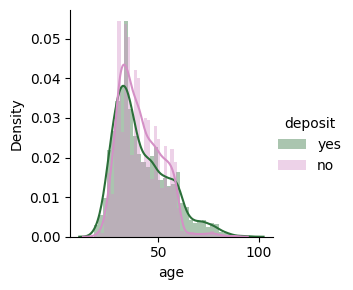

In [27]:
dist_bivariate('age')

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


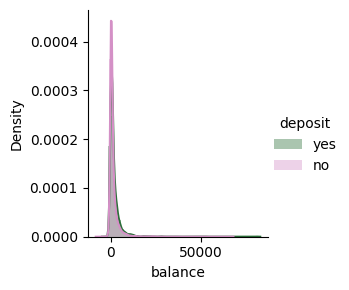

In [28]:
dist_bivariate('balance')

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


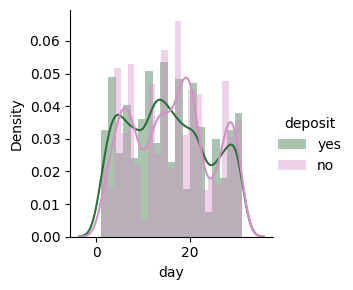

In [29]:
dist_bivariate("day")

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


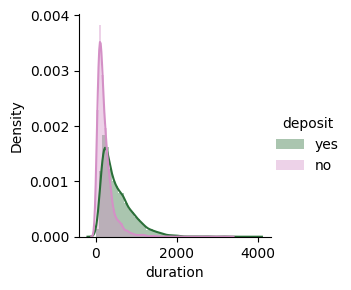

In [30]:
dist_bivariate("duration")

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


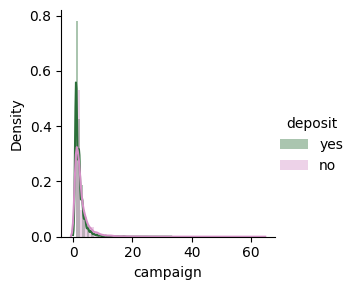

In [31]:
dist_bivariate('campaign')

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


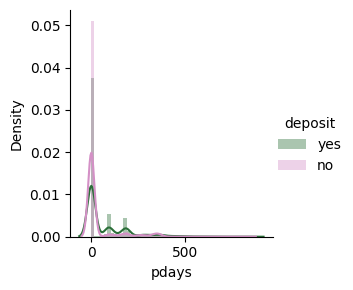

In [32]:
dist_bivariate('pdays')

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


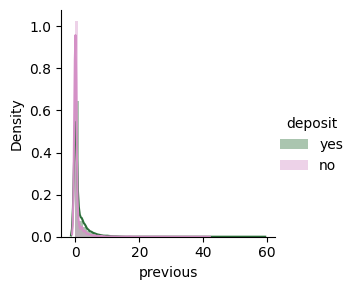

In [33]:
dist_bivariate("previous")

### Removing redundant variable based on business value
https://finansial.bisnis.com/read/20220730/90/1561069/bca-bbca-catat-ada-48000-nasabah-aktif-gunakan-layanan-sms-banking

About redundant variable:

https://medium.com/analytics-vidhya/feature-selection-extended-overview-b58f1d524c1c

https://medium.com/@data.science.enthusiast/feature-selection-techniques-forward-backward-wrapper-selection-9587f3c70cfa

In [34]:
#train
train = train[(train.age >= 18) & (train.age <= 90)]
train = train[train.day > 0]
train = train[train.duration >= 0]
train = train[train.pdays >= 0]
train = train[train.previous >= 0]

#test
test = test[(test.age >= 18) & (test.age <= 90)]
test = test[test.day > 0]
test = test[test.duration >= 0]
test = test[test.pdays >= 0]
test = test[test.previous >= 0]

## B. Data Preparation : Data Train (Data Pre-Processing)
1. Drop Duplicated Data
2. Outliers Analysis
3. Missing Value Handling
4. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data. This is done on each data train and data test, so as to avoid data leakage.

About data leakage: 

https://abnormalsecurity.com/glossary/data-leak

https://medium.com/@gurupratap.matharu/data-leakage-in-machine-learning-390d560f0969

https://medium.com/geekculture/what-is-data-leakage-in-machine-learning-and-what-are-its-effects-811d58be7ccd

##### 1. Drop Duplicated Data

In [35]:
# Detect duplicate data
train[train.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [36]:
print("Before drop duplicated data")
train.shape

Before drop duplicated data


(2284, 17)

In [37]:
train = train.drop_duplicates(keep='first')

In [38]:
print("After drop duplicated data")
train.shape

After drop duplicated data


(2284, 17)

In [39]:
#Check again for duplicated data
train[train.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


There are not duplicated rows again after drop duplicated.

##### 2. Outliers Analysis

##### Removing Outliers
Using IQR because from numerical data, the distribution data is not normal distribution

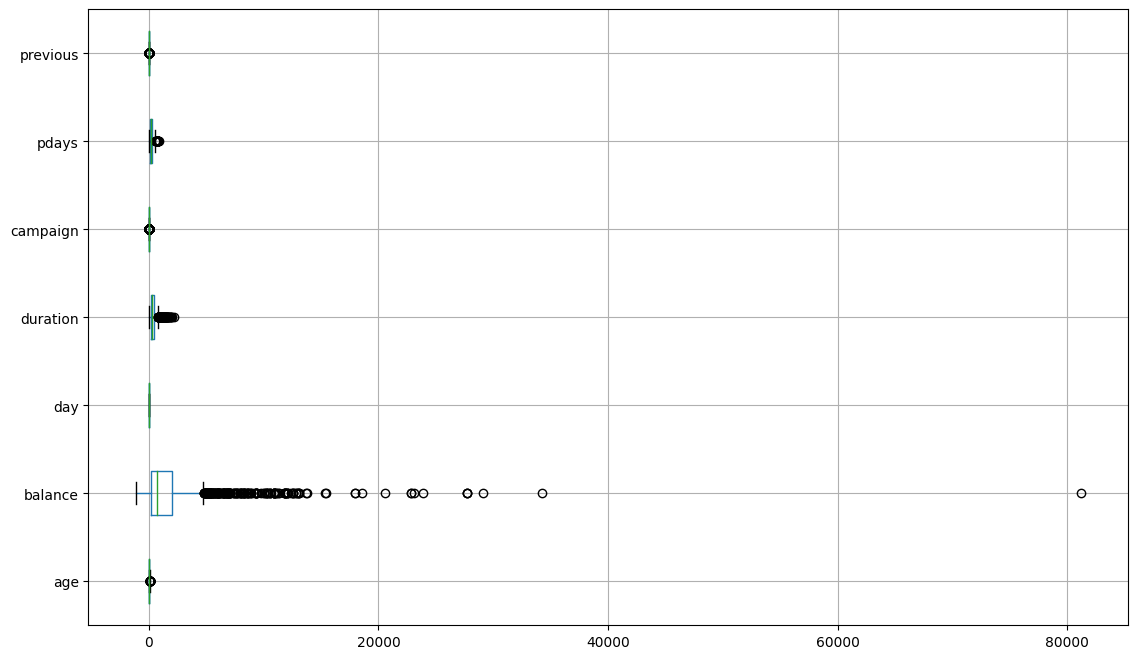

In [40]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

###### remove outliers : previous column

In [41]:
train.shape

(2284, 17)

In [42]:
Q1 = train["previous"].quantile(0.25)
Q3 = train["previous"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [43]:
train = train[(train["previous"] >= low_limit) &
                        (train["previous"] <= high_limit)
                        ]

In [44]:
train.shape

(2160, 17)

###### remove outliers : pdays column

In [45]:
train.shape

(2160, 17)

In [46]:
Q1 = train["pdays"].quantile(0.25)
Q3 = train["pdays"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [47]:
train = train[(train["pdays"] >= low_limit) &
                        (train["pdays"] <= high_limit)
                        ]

In [48]:
train.shape

(2138, 17)

###### remove outliers : campaign column

In [49]:
train.shape

(2138, 17)

In [50]:
Q1 = train["campaign"].quantile(0.25)
Q3 = train["campaign"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [51]:
train = train[(train["campaign"] >= low_limit) &
                        (train["campaign"] <= high_limit)
                        ]

In [52]:
train.shape

(1944, 17)

###### remove outliers : duration column

In [53]:
train.shape

(1944, 17)

In [54]:
Q1 = train["duration"].quantile(0.25)
Q3 = train["duration"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [55]:
train = train[(train["duration"] >= low_limit) &
                        (train["duration"] <= high_limit)
                        ]

In [56]:
train.shape

(1818, 17)

###### remove outliers :  day column

In [57]:
train.shape

(1818, 17)

In [58]:
Q1 = train["day"].quantile(0.25)
Q3 = train["day"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [59]:
train = train[(train["day"] >= low_limit) &
                        (train["day"] <= high_limit)
                        ]

In [60]:
train.shape

(1818, 17)

###### remove outliers : balance column

In [61]:
train.shape

(1818, 17)

In [62]:
Q1 = train["balance"].quantile(0.25)
Q3 = train["balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [63]:
train = train[(train["balance"] >= low_limit) &
                        (train["balance"] <= high_limit)
                        ]

In [64]:
train.shape

(1674, 17)

###### remove outliers : age column

In [65]:
train.shape

(1674, 17)

In [66]:
Q1 = train["age"].quantile(0.25)
Q3 = train["age"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [67]:
train = train[(train["age"] >= low_limit) &
                        (train["age"] <= high_limit)
                        ]

In [68]:
train.shape

(1639, 17)

#### Now there are no outliers in train Data

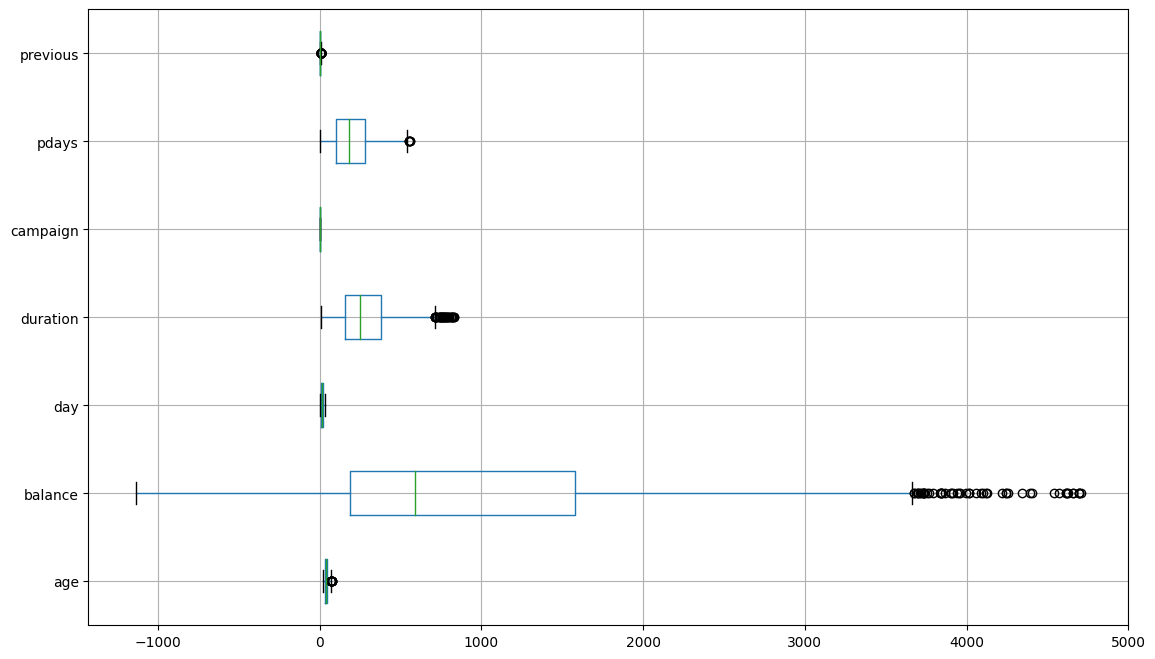

In [69]:
# Outlier Analysis checking again

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

#### 3. Missing Value Handling

In [70]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success,yes
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success,yes
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure,yes
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,yes
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success,yes
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success,yes


In [71]:
train.sample(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2360,42,entrepreneur,married,secondary,no,2959,yes,no,telephone,2,jul,711,1,342,1,failure,yes
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
9021,57,technician,married,secondary,no,28,yes,no,cellular,8,may,163,1,358,1,failure,no
6043,36,management,married,tertiary,no,1582,no,no,telephone,3,feb,26,2,197,1,failure,no
10175,29,blue-collar,single,secondary,no,234,yes,no,cellular,8,may,139,1,345,1,other,no
3456,26,management,single,tertiary,no,1438,no,no,cellular,27,apr,321,1,449,1,other,yes
7062,45,technician,married,secondary,no,1441,yes,no,cellular,18,nov,93,1,113,2,other,no


##### Missing Value Check each rows

In [72]:
train['n_missing'] = train.isnull().sum(axis=1)

In [73]:
train.sort_values('n_missing',ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,n_missing
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes,0
1746,29,blue-collar,single,secondary,no,734,yes,yes,cellular,30,apr,259,1,296,1,other,yes,0
6624,58,services,married,secondary,no,-37,no,yes,telephone,6,feb,150,2,205,6,failure,no,0
10696,29,technician,single,tertiary,no,940,yes,no,cellular,15,may,757,1,330,1,failure,no,0
4698,30,management,married,tertiary,no,1942,yes,yes,cellular,21,nov,436,2,178,3,other,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,33,management,married,tertiary,no,271,yes,no,cellular,13,nov,182,2,91,2,success,yes,0
10652,35,technician,married,secondary,no,128,no,yes,cellular,29,jan,456,1,205,2,other,no,0
2642,30,admin.,single,secondary,no,2568,no,no,cellular,4,sep,563,1,100,4,other,yes,0
2763,57,management,married,tertiary,no,1318,no,no,cellular,16,oct,115,1,185,2,failure,yes,0


In [74]:
train.drop('n_missing', axis=1, inplace=True)

In [75]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success,yes
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success,yes
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure,yes
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,yes
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success,yes
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success,yes


##### Missing Value check each columns

In [76]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [77]:
train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##### Missing value check NaN

In [78]:
train.isnull().sum().sum()

0

In [79]:
train.isnull().any().any()

False

In [80]:
count_nan = train.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [81]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= age =================


34    91
33    84
31    67
32    66
30    65
37    63
35    62
36    62
29    59
38    51
28    51
39    46
40    46
44    43
47    41
43    40
27    38
55    36
48    34
46    33
42    32
41    32
45    30
26    29
56    29
60    26
54    25
51    25
52    25
49    24
57    22
59    21
50    21
53    20
61    18
24    18
58    17
25    17
62    15
23    15
22    12
63    10
68     8
64     7
73     7
72     7
66     7
21     5
69     5
74     5
71     5
65     5
20     5
19     4
67     4
70     3
18     1
Name: age, dtype: int64


============= job =================


management       402
technician       284
admin.           247
blue-collar      222
services         117
retired          105
student           85
unemployed        55
self-employed     53
entrepreneur      34
housemaid         27
unknown            8
Name: job, dtype: int64


============= marital =================


married     898
single      582
divorced    159
Name: marital, dtype: int64


============= education =================


secondary    816
tertiary     615
primary      132
unknown       76
Name: education, dtype: int64


============= default =================


no     1629
yes      10
Name: default, dtype: int64


============= balance =================


 0       103
 2557      7
 1         6
 1646      6
 215       5
        ... 
 691       1
-55        1
 641       1
 146       1
 3528      1
Name: balance, Length: 1013, dtype: int64


============= housing =================


no     908
yes    731
Name: housing, dtype: int64


============= loan =================


no     1475
yes     164
Name: loan, dtype: int64


============= contact =================


cellular     1536
telephone      93
unknown        10
Name: contact, dtype: int64


============= day =================


12    93
13    81
15    80
4     78
11    78
18    76
2     73
5     66
30    63
3     62
6     61
14    61
17    60
7     58
9     57
8     56
16    54
20    49
21    49
29    44
22    43
19    41
25    41
28    38
10    36
27    36
26    33
1     26
23    21
24    15
31    10
Name: day, dtype: int64


============= month =================


may    354
nov    187
apr    182
aug    180
feb    162
oct    125
jun    104
sep     97
jul     82
jan     69
mar     63
dec     34
Name: month, dtype: int64


============= duration =================


134    11
226    10
182    10
265    10
261     9
       ..
638     1
725     1
412     1
10      1
510     1
Name: duration, Length: 597, dtype: int64


============= campaign =================


1    949
2    494
3    196
Name: campaign, dtype: int64


============= pdays =================


92     59
182    50
91     48
183    48
181    46
       ..
118     1
27      1
239     1
475     1
198     1
Name: pdays, Length: 370, dtype: int64


============= previous =================


1    573
2    428
3    267
4    146
5     93
6     61
8     38
7     33
Name: previous, dtype: int64


============= poutcome =================


failure    707
success    655
other      276
unknown      1
Name: poutcome, dtype: int64


============= deposit =================


yes    1084
no      555
Name: deposit, dtype: int64

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- Job: unknown
- Education: unknown
- Contact: unknown
- poutcome : unknown

balance: average yearly balance, if the value is negative because banks charge fees when this happens. And your bank could close your account if it stays negative for too long.
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values. Should we drop that column? Or should we impute the missing value?

First, we have to see what's the percentage of missing value in that column. **If it contained a lot of missing value (let say >35%), then we can just drop that column**. If not, then we can do some imputation.

##### Check percentage of missing value in each column selection

In [82]:
100 * len(train[train['job'].isin(['unknown'])]) / len(train)

0.4881025015253203

In [83]:
100 * len(train[train['education'].isin(['unknown'])]) / len(train)

4.636973764490543

In [84]:
100 * len(train[train['contact'].isin(['unknown'])]) / len(train)

0.6101281269066504

In [85]:
100 * len(train[train['poutcome'].isin(['unknown'])]) / len(train)

0.06101281269066504

##### imputation data for : job, education, contact columns

In [86]:
# Mode imputation on job column

mode_job = train[~train['job'].isin(['unknown'])]['job'].mode()[0]

train['job'] = train['job'].apply(lambda x: mode_job if x in ['unknown'] else x)

In [87]:
mode_job

'management'

In [88]:
train['job'].value_counts()

management       410
technician       284
admin.           247
blue-collar      222
services         117
retired          105
student           85
unemployed        55
self-employed     53
entrepreneur      34
housemaid         27
Name: job, dtype: int64

In [89]:
# Mode imputation on education column

mode_education = train[~train['education'].isin(['unknown'])]['education'].mode()[0]

train['education'] = train['education'].apply(lambda x: mode_education if x in ['unknown'] else x)

In [90]:
mode_education

'secondary'

In [91]:
train['education'].value_counts()

secondary    892
tertiary     615
primary      132
Name: education, dtype: int64

In [92]:
# Mode imputation on contact column

mode_contact = train[~train['contact'].isin(['unknown'])]['contact'].mode()[0]

train['contact'] = train['contact'].apply(lambda x: mode_contact if x in ['unknown'] else x)

In [93]:
mode_contact

'cellular'

In [94]:
train['contact'].value_counts()

cellular     1546
telephone      93
Name: contact, dtype: int64

In [95]:
# Mode imputation on poutcome column

mode_poutcome = train[~train['poutcome'].isin(['unknown'])]['poutcome'].mode()[0]

train['poutcome'] = train['poutcome'].apply(lambda x: mode_poutcome if x in ['unknown'] else x)

In [96]:
mode_poutcome

'failure'

In [97]:
train['poutcome'].value_counts()

failure    708
success    655
other      276
Name: poutcome, dtype: int64

#### Check again for each columns

In [98]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= age =================


34    91
33    84
31    67
32    66
30    65
37    63
35    62
36    62
29    59
38    51
28    51
39    46
40    46
44    43
47    41
43    40
27    38
55    36
48    34
46    33
42    32
41    32
45    30
26    29
56    29
60    26
54    25
51    25
52    25
49    24
57    22
59    21
50    21
53    20
61    18
24    18
58    17
25    17
62    15
23    15
22    12
63    10
68     8
64     7
73     7
72     7
66     7
21     5
69     5
74     5
71     5
65     5
20     5
19     4
67     4
70     3
18     1
Name: age, dtype: int64


============= job =================


management       410
technician       284
admin.           247
blue-collar      222
services         117
retired          105
student           85
unemployed        55
self-employed     53
entrepreneur      34
housemaid         27
Name: job, dtype: int64


============= marital =================


married     898
single      582
divorced    159
Name: marital, dtype: int64


============= education =================


secondary    892
tertiary     615
primary      132
Name: education, dtype: int64


============= default =================


no     1629
yes      10
Name: default, dtype: int64


============= balance =================


 0       103
 2557      7
 1         6
 1646      6
 215       5
        ... 
 691       1
-55        1
 641       1
 146       1
 3528      1
Name: balance, Length: 1013, dtype: int64


============= housing =================


no     908
yes    731
Name: housing, dtype: int64


============= loan =================


no     1475
yes     164
Name: loan, dtype: int64


============= contact =================


cellular     1546
telephone      93
Name: contact, dtype: int64


============= day =================


12    93
13    81
15    80
4     78
11    78
18    76
2     73
5     66
30    63
3     62
6     61
14    61
17    60
7     58
9     57
8     56
16    54
20    49
21    49
29    44
22    43
19    41
25    41
28    38
10    36
27    36
26    33
1     26
23    21
24    15
31    10
Name: day, dtype: int64


============= month =================


may    354
nov    187
apr    182
aug    180
feb    162
oct    125
jun    104
sep     97
jul     82
jan     69
mar     63
dec     34
Name: month, dtype: int64


============= duration =================


134    11
226    10
182    10
265    10
261     9
       ..
638     1
725     1
412     1
10      1
510     1
Name: duration, Length: 597, dtype: int64


============= campaign =================


1    949
2    494
3    196
Name: campaign, dtype: int64


============= pdays =================


92     59
182    50
91     48
183    48
181    46
       ..
118     1
27      1
239     1
475     1
198     1
Name: pdays, Length: 370, dtype: int64


============= previous =================


1    573
2    428
3    267
4    146
5     93
6     61
8     38
7     33
Name: previous, dtype: int64


============= poutcome =================


failure    708
success    655
other      276
Name: poutcome, dtype: int64


============= deposit =================


yes    1084
no      555
Name: deposit, dtype: int64

In [99]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success,yes
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success,yes
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure,yes
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,yes
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success,yes
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success,yes


After we doing the missing value handling and imputation, we do the imputation and drop poutcome in data test, we inject the information from imputation data train to data test. `we do it for the predict in data test after modelling.` Do the same for data preparation modelling in data test but when imputate it reference to treatment in data train.

## C. Data Preparation : Data Test
1. Drop Duplicated Data
2. Outliers Analysis
3. Missing Value Handling
4. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data

##### 1. Drop Duplicated Data

In [100]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure,yes
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success,yes
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure,yes
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure,no
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
8733,43,self-employed,married,tertiary,no,3157,no,no,cellular,21,apr,381,2,330,17,other,no
3598,31,management,single,tertiary,no,147,no,no,cellular,9,jun,163,2,92,3,success,yes


In [101]:
# Detect duplicate data
test[test.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [102]:
print("Before drop duplicated data test")
test.shape

Before drop duplicated data test


(551, 17)

In [103]:
test = test.drop_duplicates(keep='first')

In [104]:
print("After drop duplicated data test")
test.shape

After drop duplicated data test


(551, 17)

In [105]:
#Check again for duplicated data
test[test.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


##### 2. Remove Outliers
Using IQR

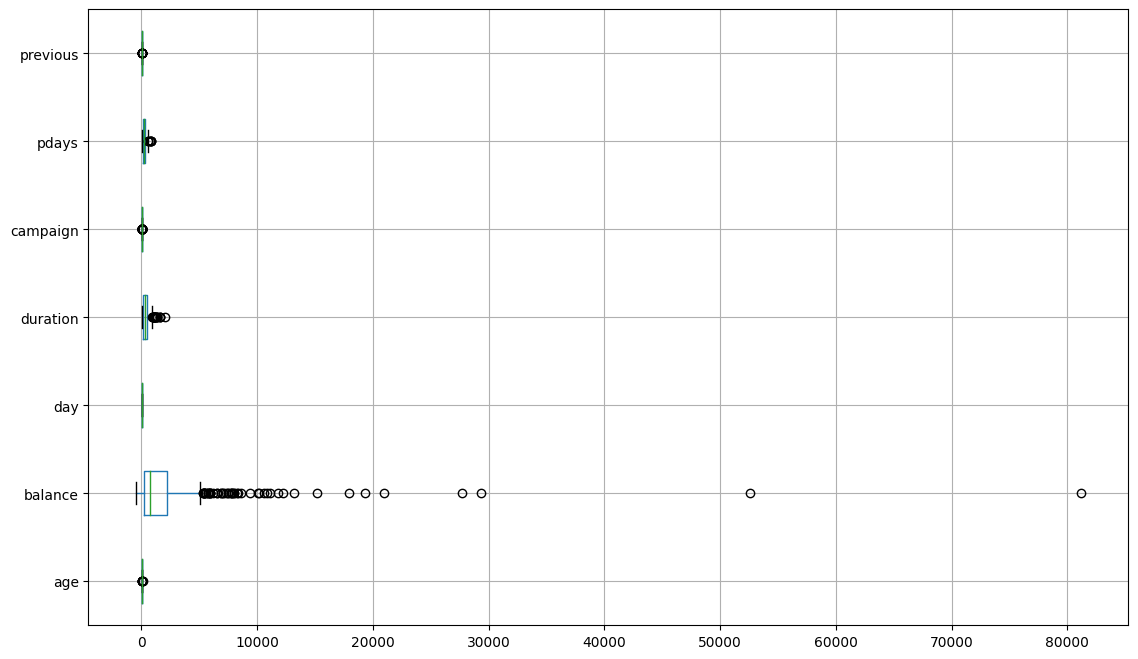

In [106]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
test.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

###### remove outliers : previous column

In [107]:
print("Before remove outliers",test.shape)

Before remove outliers (551, 17)


In [108]:
Q1 = test["previous"].quantile(0.25)
Q3 = test["previous"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [109]:
test = test[(test["previous"] >= low_limit) &
                        (test["previous"] <= high_limit)
                        ]

In [110]:
print("After remove outliers",test.shape)

After remove outliers (536, 17)


###### remove outliers : pdays column

In [111]:
print("Before remove outliers",test.shape)

Before remove outliers (536, 17)


In [112]:
Q1 = test["pdays"].quantile(0.25)
Q3 = test["pdays"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [113]:
test = test[(test["pdays"] >= low_limit) &
                        (test["pdays"] <= high_limit)
                        ]

In [114]:
print("After remove outliers",test.shape)

After remove outliers (529, 17)


###### remove outliers : campaign column

In [115]:
print("Before remove outliers",test.shape)

Before remove outliers (529, 17)


In [116]:
Q1 = test["campaign"].quantile(0.25)
Q3 = test["campaign"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [117]:
test = test[(test["campaign"] >= low_limit) &
                        (test["campaign"] <= high_limit)
                        ]

In [118]:
print("After remove outliers",test.shape)

After remove outliers (474, 17)


###### remove outliers : duration column

In [119]:
print("Before remove outliers",test.shape)

Before remove outliers (474, 17)


In [120]:
Q1 = test["duration"].quantile(0.25)
Q3 = test["duration"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [121]:
test = test[(test["duration"] >= low_limit) &
                        (test["duration"] <= high_limit)
                        ]

In [122]:
print("After remove outliers",test.shape)

After remove outliers (448, 17)


###### remove outliers : day column

In [123]:
print("Before remove outliers",test.shape)

Before remove outliers (448, 17)


In [124]:
Q1 = test["day"].quantile(0.25)
Q3 = test["day"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [125]:
test = test[(test["day"] >= low_limit) &
                        (test["day"] <= high_limit)
                        ]

In [126]:
print("After remove outliers",test.shape)

After remove outliers (448, 17)


###### remove outliers : balance column

In [127]:
print("Before remove outliers",test.shape)

Before remove outliers (448, 17)


In [128]:
Q1 = test["balance"].quantile(0.25)
Q3 = test["balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [129]:
test = test[(test["balance"] >= low_limit) &
                        (test["balance"] <= high_limit)
                        ]

In [130]:
print("After remove outliers",test.shape)

After remove outliers (406, 17)


###### remove outliers : age column

In [131]:
print("Before remove outliers",test.shape)

Before remove outliers (406, 17)


In [132]:
Q1 = test["age"].quantile(0.25)
Q3 = test["age"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [133]:
test = test[(test["age"] >= low_limit) &
                        (test["age"] <= high_limit)
                        ]

In [134]:
print("After remove outliers",test.shape)

After remove outliers (400, 17)


##### Now there are no outliers in Data Test

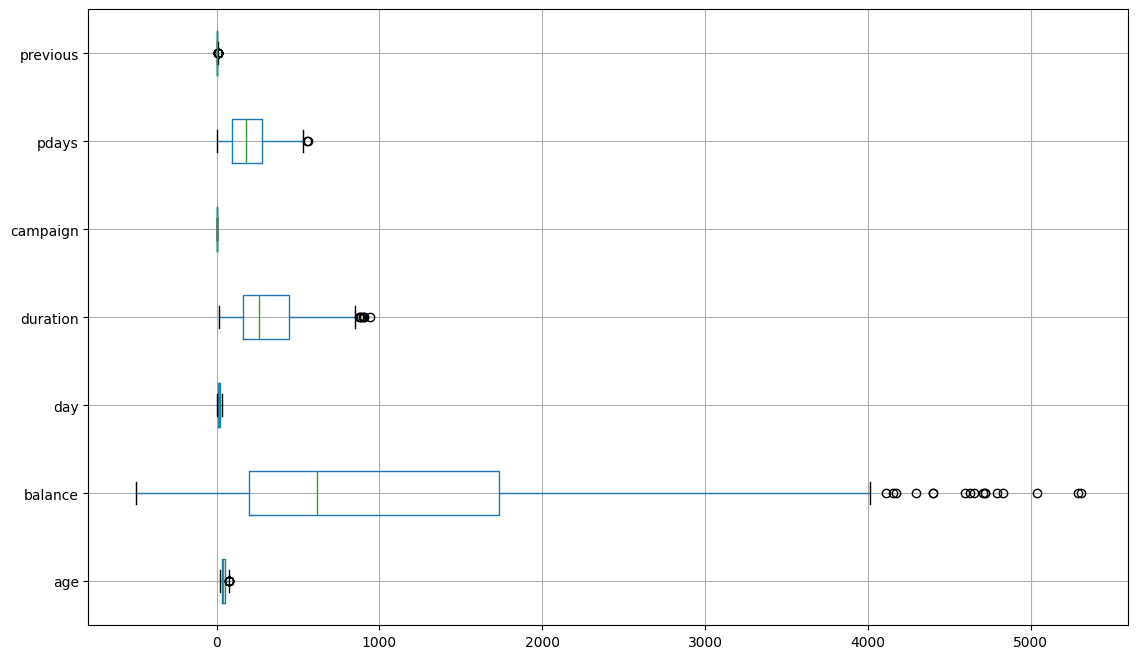

In [135]:
# Outlier Analysis checking again

plt.figure(figsize=(16, 8))

# Create Boxplot
test.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

#### 3. Missing Value Handling

In [136]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure,yes
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success,yes
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure,yes
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,32,technician,married,secondary,no,253,yes,no,cellular,21,nov,76,1,170,3,failure,no
3165,67,retired,divorced,secondary,no,704,no,no,cellular,8,feb,186,2,97,1,success,yes
5574,30,technician,single,secondary,no,728,yes,no,cellular,5,feb,393,1,261,1,other,no
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure,no


##### Missing Value Check each rows

In [137]:
test['n_missing'] = test.isnull().sum(axis=1)
test.sort_values('n_missing',ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,n_missing
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no,0
6974,36,management,single,tertiary,no,4,yes,no,cellular,7,jul,529,1,61,3,success,no,0
4934,53,services,divorced,secondary,no,36,yes,yes,unknown,2,jul,25,1,417,1,success,yes,0
9080,33,services,married,secondary,no,387,yes,no,cellular,7,apr,327,2,138,2,failure,no,0
3556,30,admin.,single,secondary,no,265,yes,no,cellular,25,may,681,1,181,2,success,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,69,retired,married,secondary,no,0,no,no,cellular,27,jul,666,1,90,4,success,yes,0
2918,29,management,single,tertiary,no,1026,no,no,cellular,12,nov,226,1,92,1,other,yes,0
6647,46,services,divorced,secondary,no,355,yes,no,cellular,8,may,122,2,338,8,other,no,0
5387,53,self-employed,married,secondary,no,248,no,yes,cellular,17,nov,99,1,126,3,failure,no,0


In [138]:
test.drop('n_missing', axis=1, inplace=True)
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure,yes
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success,yes
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure,yes
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,32,technician,married,secondary,no,253,yes,no,cellular,21,nov,76,1,170,3,failure,no
3165,67,retired,divorced,secondary,no,704,no,no,cellular,8,feb,186,2,97,1,success,yes
5574,30,technician,single,secondary,no,728,yes,no,cellular,5,feb,393,1,261,1,other,no
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure,no


##### Missing Value check each columns

In [139]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [140]:
test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [141]:
count_nan_in_test = test.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_test))

Count of NaN: 0


In [142]:
check_nan_in_test = test.isnull().values.any()
print (check_nan_in_test)

False


In [143]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= age =================


37    22
33    21
36    19
32    18
35    17
34    16
30    15
31    14
39    14
43    11
29    11
38    11
45    11
53    11
40    10
47    10
41    10
42     9
52     9
54     9
50     9
27     8
26     8
48     6
60     6
57     6
25     5
56     5
28     5
61     5
46     5
51     4
58     4
62     4
55     4
67     4
59     3
22     3
77     3
69     3
70     3
68     3
49     3
44     3
71     3
23     3
73     2
72     2
24     2
76     2
66     1
19     1
63     1
64     1
18     1
78     1
Name: age, dtype: int64


============= job =================


management       102
blue-collar       61
admin.            53
technician        48
retired           37
services          31
unemployed        17
student           15
self-employed     12
housemaid         11
entrepreneur       8
unknown            5
Name: job, dtype: int64


============= marital =================


married     238
single      124
divorced     38
Name: marital, dtype: int64


============= education =================


secondary    201
tertiary     141
primary       40
unknown       18
Name: education, dtype: int64


============= default =================


no     399
yes      1
Name: default, dtype: int64


============= balance =================


0       21
96       3
2206     3
602      2
415      2
        ..
2269     1
2367     1
1464     1
294      1
147      1
Name: balance, Length: 340, dtype: int64


============= housing =================


no     211
yes    189
Name: housing, dtype: int64


============= loan =================


no     359
yes     41
Name: loan, dtype: int64


============= contact =================


cellular     382
telephone     16
unknown        2
Name: contact, dtype: int64


============= day =================


13    30
8     20
30    20
4     20
11    19
3     18
12    17
15    17
29    16
5     15
9     15
7     14
16    13
18    13
17    13
6     13
27    12
21    12
10    11
20    11
14     9
2      9
22     9
28     8
1      8
19     8
26     8
25     8
24     7
23     6
31     1
Name: day, dtype: int64


============= month =================


may    71
apr    51
feb    51
nov    45
aug    36
jul    29
sep    28
oct    27
jun    24
jan    18
mar    14
dec     6
Name: month, dtype: int64


============= duration =================


158    4
232    4
449    3
181    3
336    3
      ..
69     1
31     1
229    1
325    1
393    1
Name: duration, Length: 300, dtype: int64


============= campaign =================


1    228
2    132
3     40
Name: campaign, dtype: int64


============= pdays =================


92     18
181    17
182    15
91     14
183    11
       ..
8       1
378     1
165     1
476     1
348     1
Name: pdays, Length: 199, dtype: int64


============= previous =================


1     122
2     100
3      61
5      36
4      29
6      17
7      15
8       7
10      6
11      5
9       2
Name: previous, dtype: int64


============= poutcome =================


failure    181
success    154
other       65
Name: poutcome, dtype: int64


============= deposit =================


yes    273
no     127
Name: deposit, dtype: int64

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :

- Job: unknown
- Education: unknown
- Contact: unknown

Because of poutcome column has been dropped.
balance: average yearly balance, if the value is negative because banks charge fees when this happens. And your bank could close your account if it stays negative for too long. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values. Should we drop that column? Or should we impute the missing value?

First, we have to see what's the percentage of missing value in that column. If it contained a lot of missing value (let say >35%), then we can just drop that column. If not, then we can do some imputation.

#### Check percentage of missing value in each column selection

In [144]:
100 * len(test[test['job'].isin(['unknown'])]) / len(test)

1.25

In [145]:
100 * len(test[test['education'].isin(['unknown'])]) / len(test)

4.5

In [146]:
100 * len(test[test['contact'].isin(['unknown'])]) / len(test)

0.5

for me contact column is important to analyze because of in this dataset, the marketing target way is only using celullar and telephone so we mustn't to drop it since the % missing value near 35%. So, we just drop poutcome column. I hope it's wise choice to imputing another column with unknown value.

#### imputation data for : job, education, contact columns based on data train as reference imputation

In [147]:
# Mode imputation on job column
test['job'] = test['job'].apply(lambda x: mode_job if x in ['unknown'] else x)

In [148]:
test['job'].value_counts()

management       107
blue-collar       61
admin.            53
technician        48
retired           37
services          31
unemployed        17
student           15
self-employed     12
housemaid         11
entrepreneur       8
Name: job, dtype: int64

In [149]:
# Mode imputation on education column
test['education'] = test['education'].apply(lambda x: mode_education if x in ['unknown'] else x)

In [150]:
test['education'].value_counts()

secondary    219
tertiary     141
primary       40
Name: education, dtype: int64

In [151]:
# Mode imputation on contact column
test['contact'] = test['contact'].apply(lambda x: mode_contact if x in ['unknown'] else x)

In [152]:
test['contact'].value_counts()

cellular     384
telephone     16
Name: contact, dtype: int64

In [153]:
# Mode imputation on poutcome column

test['poutcome'] = test['poutcome'].apply(lambda x: mode_poutcome if x in ['unknown'] else x)

#### Check again for each columns

In [154]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= age =================


37    22
33    21
36    19
32    18
35    17
34    16
30    15
31    14
39    14
43    11
29    11
38    11
45    11
53    11
40    10
47    10
41    10
42     9
52     9
54     9
50     9
27     8
26     8
48     6
60     6
57     6
25     5
56     5
28     5
61     5
46     5
51     4
58     4
62     4
55     4
67     4
59     3
22     3
77     3
69     3
70     3
68     3
49     3
44     3
71     3
23     3
73     2
72     2
24     2
76     2
66     1
19     1
63     1
64     1
18     1
78     1
Name: age, dtype: int64


============= job =================


management       107
blue-collar       61
admin.            53
technician        48
retired           37
services          31
unemployed        17
student           15
self-employed     12
housemaid         11
entrepreneur       8
Name: job, dtype: int64


============= marital =================


married     238
single      124
divorced     38
Name: marital, dtype: int64


============= education =================


secondary    219
tertiary     141
primary       40
Name: education, dtype: int64


============= default =================


no     399
yes      1
Name: default, dtype: int64


============= balance =================


0       21
96       3
2206     3
602      2
415      2
        ..
2269     1
2367     1
1464     1
294      1
147      1
Name: balance, Length: 340, dtype: int64


============= housing =================


no     211
yes    189
Name: housing, dtype: int64


============= loan =================


no     359
yes     41
Name: loan, dtype: int64


============= contact =================


cellular     384
telephone     16
Name: contact, dtype: int64


============= day =================


13    30
8     20
30    20
4     20
11    19
3     18
12    17
15    17
29    16
5     15
9     15
7     14
16    13
18    13
17    13
6     13
27    12
21    12
10    11
20    11
14     9
2      9
22     9
28     8
1      8
19     8
26     8
25     8
24     7
23     6
31     1
Name: day, dtype: int64


============= month =================


may    71
apr    51
feb    51
nov    45
aug    36
jul    29
sep    28
oct    27
jun    24
jan    18
mar    14
dec     6
Name: month, dtype: int64


============= duration =================


158    4
232    4
449    3
181    3
336    3
      ..
69     1
31     1
229    1
325    1
393    1
Name: duration, Length: 300, dtype: int64


============= campaign =================


1    228
2    132
3     40
Name: campaign, dtype: int64


============= pdays =================


92     18
181    17
182    15
91     14
183    11
       ..
8       1
378     1
165     1
476     1
348     1
Name: pdays, Length: 199, dtype: int64


============= previous =================


1     122
2     100
3      61
5      36
4      29
6      17
7      15
8       7
10      6
11      5
9       2
Name: previous, dtype: int64


============= poutcome =================


failure    181
success    154
other       65
Name: poutcome, dtype: int64


============= deposit =================


yes    273
no     127
Name: deposit, dtype: int64

#### Check for test data and train data

In [155]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure,yes
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success,yes
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure,yes
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,32,technician,married,secondary,no,253,yes,no,cellular,21,nov,76,1,170,3,failure,no
3165,67,retired,divorced,secondary,no,704,no,no,cellular,8,feb,186,2,97,1,success,yes
5574,30,technician,single,secondary,no,728,yes,no,cellular,5,feb,393,1,261,1,other,no
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure,no


In [156]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success,yes
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success,yes
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure,yes
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,yes
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success,yes
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success,yes


#### Split into Xtrain,ytrain,Xtest,ytest

In [157]:
#train dataset
Xtrain = train.iloc[:,:-1] #drop the last column
ytrain = train.iloc[:,-1] #choose the last column

#test dataset
Xtest = test.iloc[:,:-1] #drop the last column
ytest = test.iloc[:,-1] #choose the last column

print('There are {} samples in the training set and {} samples in the test set.'.format(
Xtrain.shape[0] , Xtest.shape[0]))
print()

There are 1639 samples in the training set and 400 samples in the test set.



In [158]:
Xtrain

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success


In [159]:
ytrain

2632    yes
3056    yes
1928    yes
4095    yes
7242     no
       ... 
4846    yes
4804    yes
1665    yes
3752    yes
3751    yes
Name: deposit, Length: 1639, dtype: object

In [160]:
Xtest

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,32,technician,married,secondary,no,253,yes,no,cellular,21,nov,76,1,170,3,failure
3165,67,retired,divorced,secondary,no,704,no,no,cellular,8,feb,186,2,97,1,success
5574,30,technician,single,secondary,no,728,yes,no,cellular,5,feb,393,1,261,1,other
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure


In [161]:
ytest

7949     no
1532    yes
4016    yes
1024    yes
7154     no
       ... 
7108     no
3165    yes
5574     no
9860     no
3598    yes
Name: deposit, Length: 400, dtype: object

#### Chi-Square Test

In [162]:
#Categorical Data
train_job = pd.crosstab(Xtrain.job,ytrain)
train_marital = pd.crosstab(Xtrain.marital,ytrain)
train_education = pd.crosstab(Xtrain.education,ytrain)
train_default = pd.crosstab(Xtrain.default,ytrain)
train_housing = pd.crosstab(Xtrain.housing,ytrain)
train_loan = pd.crosstab(Xtrain.loan,ytrain)
train_contact = pd.crosstab(Xtrain.contact,ytrain)
train_month = pd.crosstab(Xtrain.month,ytrain)

#Numerical Data
train_age = pd.crosstab(Xtrain.age,ytrain)
train_balance = pd.crosstab(Xtrain.balance,ytrain)
train_day = pd.crosstab(Xtrain.day,ytrain)
train_duration = pd.crosstab(Xtrain.duration,ytrain)
train_campaign = pd.crosstab(Xtrain.campaign,ytrain)
train_pdays = pd.crosstab(Xtrain.pdays,ytrain)
train_previous = pd.crosstab(Xtrain.previous,ytrain)


#returns four values, 𝜒2 value, p-value, degree of freedom and expected values.

data_column = [train_age,train_balance,train_day,train_duration,train_campaign,train_pdays,train_previous,train_job,train_marital,train_education,train_default,train_housing,train_loan,train_contact,train_month]

print("P values of every column")
n=1
for x in data_column:
  
  chi, pval, dof, exp = chi2_contingency(x)
  significance = 0.05
  print(n,'. -------------------------------',x.index.name,'---------------------------------')

  print('p-value=%.6f, significance=%.2f\n' % (pval, significance))
  if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.""" % (significance))
  else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
  They are independent.""" % (significance))
    
  #print(x.index.name," = " ,chi2_contingency(x)[1]) # print p values

  print('  --------------------------------------------------------------------------------\n\n')
  n+=1

P values of every column
1 . ------------------------------- age ---------------------------------
p-value=0.000044, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.
  --------------------------------------------------------------------------------


2 . ------------------------------- balance ---------------------------------
p-value=0.015449, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.
  --------------------------------------------------------------------------------


3 . ------------------------------- day ---------------------------------
p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.
  --------------------------------------------------------------------------------


4 . ------------------------------- duration -----------------------

The Purpose of Chi-Square Test is carried out to investigate the dependency between the both categorical x and y.
Based on the results below, the attribute job, marital, education, defualt, housing, loan, contact, month, poutcome, age, balance, duration, day, campaign, pdays, and previous are not independent to subscribed, we reject the null hypotheses and accept H1.

#### 4. Encoding Preparation : Data Train and Data Test

The sklearn LabelEncoder function is utilized to encode the categorical variables such as job, marital, education, contact, poutcome, default, housing, loan, subscribed and month.


In [163]:
train['poutcome'].value_counts()

failure    708
success    655
other      276
Name: poutcome, dtype: int64

In [164]:
def encoding_process(df_x , df_y):

  df = pd.concat([df_x,df_y],axis=1)
  
  label_encoder = preprocessing.LabelEncoder()

  nominal_cols = ['job', 'marital', 'contact']
  for name in nominal_cols:
    df[name] = label_encoder.fit_transform(df[name])
    df[name].value_counts()

  #encoding 'default' , 'housing', 'loan' attributes 
  # 1 is yes , 0 is no
  mapping_dictionary = {"default" :{"yes" : 1 , "no" : 0},
                      "housing"  :{"yes" : 1 , "no" : 0},
                      "loan" :{"yes" : 1 , "no" : 0} ,
                      "deposit" : {"yes" : 1 , "no" : 0},
                       "education" : {'tertiary':3,'secondary':2,'primary':1 #leveling encoding
                                     },
                       "poutcome":{"success":2,"other":1,'failure':0}}

  df = df.replace(mapping_dictionary)

  #month
  replace_dictionary = { "month" : {"jan" : 1 , 
                                  "feb" : 2,
                                  "mar" : 3,
                                  "apr" : 4,
                                  "may" : 5,
                                  "jun" : 6,
                                  "jul" : 7,
                                  "aug" : 8,
                                  "sep" : 9,
                                  "oct" : 10,
                                  "nov" : 11,
                                  "dec" : 12}}

  df.replace(replace_dictionary, inplace=True)

  df_y = df.deposit
  df_x = df.drop('deposit', axis=1)
  return df_x , df_y

#### Encode separately for data train and data test

In [165]:
Xtrain , ytrain = encoding_process(Xtrain , ytrain)
Xtest , ytest = encoding_process(Xtest , ytest)

##### Let's check it
After performing label encoding operation for both train and test datasets, the categorical values are converted to numerical values.

In [166]:
Xtrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2632,46,0,1,3,0,2552,0,0,0,3,9,260,1,94,8,2
3056,25,9,2,2,0,139,0,1,0,11,1,202,1,91,1,2
1928,28,0,0,2,0,451,1,0,0,13,5,302,1,301,1,2
4095,29,0,2,2,0,464,0,0,0,9,11,208,2,91,3,2
7242,34,0,1,2,0,1467,1,0,0,17,4,113,1,332,2,0


In [167]:
Xtest.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7949,52,0,1,2,0,722,0,0,0,26,10,99,2,185,3,0
1532,34,4,1,2,1,879,1,0,0,17,4,712,1,344,1,0
4016,61,5,1,2,0,11,0,0,0,29,9,232,1,92,3,2
1024,38,2,1,3,0,1110,1,0,0,20,11,888,2,183,2,0
7154,33,9,2,2,0,3499,1,0,0,11,5,143,3,356,1,1


In [168]:
ytrain

2632    1
3056    1
1928    1
4095    1
7242    0
       ..
4846    1
4804    1
1665    1
3752    1
3751    1
Name: deposit, Length: 1639, dtype: int64

In [169]:
ytest

7949    0
1532    1
4016    1
1024    1
7154    0
       ..
7108    0
3165    1
5574    0
9860    0
3598    1
Name: deposit, Length: 400, dtype: int64

In [170]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,40.599756,1010.150702,14.275778,287.100671,1.540574,198.377059,2.550336
std,11.618357,1099.390776,8.294979,173.118330,0.698442,110.411183,1.735501
min,18.000000,-1137.000000,1.000000,8.000000,1.000000,1.000000,1.000000
25%,32.000000,187.000000,7.000000,158.000000,1.000000,98.000000,1.000000
50%,38.000000,589.000000,13.000000,252.000000,1.000000,182.000000,2.000000
75%,48.000000,1580.500000,20.000000,379.500000,2.000000,277.500000,3.000000
max,74.000000,4708.000000,31.000000,830.000000,3.000000,561.000000,8.000000


#### Split Xtrain and Xtest into different categories : numerical and categorical
The code below is is used to split the Xtrain into 2 different categories which one consists of categorical data while the other consists of numerical data.

In [171]:
Xtrain.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [172]:
non_std_var_train = Xtrain[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome']]

std_var_train = Xtrain.drop(['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome'],axis=1)    

non_std_var_test = Xtest[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome']]

std_var_test = Xtest.drop(['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome'],axis=1)

#### Standar Scaller / Feature Scalling
Since there are numerical data (continuous) in the table, StandardScaler was used to scales each input variable separately by subtracting the mean and dividing by the standard deviation in order to have a distribution of mean of zero and a standard deviation of one.

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_Xtrain = scaler.fit_transform(std_var_train)
scaled_Xtest = scaler.transform(std_var_test)

In [174]:
#Scalling Xtrain
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index() 
non_std_var_train =  non_std_var_train.reset_index() 

#Scalling Xtest
scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index() 
non_std_var_test = non_std_var_test.reset_index() 

In [175]:
#Merging Xtrain
Xtrain = pd.concat([scaled_Xtrain,non_std_var_train],axis=1)
Xtrain = Xtrain.drop(['index','index'],axis=1)   

#Merging Xtest
Xtest = pd.concat([scaled_Xtest,non_std_var_test],axis=1)
Xtest = Xtest.drop(['index','index'],axis=1)   

In [176]:
Xtrain = Xtrain.rename(columns={0: 'balance', 1: 'duration',2:'pdays'})
Xtest = Xtest.rename(columns={0: 'balance', 1: 'duration',2:'pdays'})

In [177]:
#Check Xtrain
Xtrain.head(10)

,balance,duration,pdays,age,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome
0,1.402886,-0.156592,-0.945637,46,0,1,3,0,0,0,0,3,9,1,8,2
1,-0.792636,-0.491725,-0.972817,25,9,2,2,0,0,1,0,11,1,1,1,2
2,-0.508756,0.086091,0.929745,28,0,0,2,0,1,0,0,13,5,1,1,2
3,-0.496927,-0.457056,-0.972817,29,0,2,2,0,0,0,0,9,11,2,3,2
4,0.415675,-1.005981,1.210599,34,0,1,2,0,1,0,0,17,4,1,2,0
5,-0.011965,1.542187,0.956925,62,4,1,3,0,0,0,0,22,4,1,2,2
6,0.367451,0.039865,2.922905,28,4,2,3,1,1,0,0,8,7,1,1,0
7,-0.840859,-0.197039,-0.918458,47,4,2,3,0,0,0,0,5,8,1,4,2
8,-0.003777,2.865385,-0.030596,34,4,1,3,0,1,0,0,19,11,3,2,1
9,-0.752602,-0.179705,1.274018,38,9,1,2,0,1,0,0,16,4,3,2,0


In [178]:
#Check Xtest
Xtest.head(10)

,balance,duration,pdays,age,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome
0,-0.262180,-1.086876,-0.121194,52,0,1,2,0,0,0,0,26,10,2,3,0
1,-0.119330,2.455136,1.319317,34,4,1,2,1,1,0,0,17,4,1,1,0
2,-0.909100,-0.318380,-0.963757,61,5,1,2,0,0,0,0,29,9,1,3,2
3,0.090850,3.472092,-0.139313,38,2,1,3,0,1,0,0,20,11,2,2,0
4,2.264535,-0.832637,1.428035,33,9,2,2,0,1,0,0,11,5,3,1,1
5,1.735899,3.050286,1.890086,35,7,1,2,0,0,1,0,16,7,2,3,2
6,-0.740773,1.623081,1.292138,31,1,2,2,0,1,0,0,5,5,1,7,0
7,-0.384103,0.455893,-0.972817,64,5,1,2,0,0,0,0,18,1,1,2,0
8,-0.919108,-0.849971,2.044103,30,9,2,3,0,1,0,0,5,7,1,8,2
9,-1.143847,2.680484,-1.108714,43,0,2,2,0,1,1,0,2,2,2,4,0


In [179]:
ytrain.value_counts()

1    1084
0     555
Name: deposit, dtype: int64

In [180]:
1084/(1084+555)

0.661378889566809

In [181]:
ytest.value_counts()

1    273
0    127
Name: deposit, dtype: int64

In [183]:
273/(273+127)

0.6825

## D. Baseline Modelling

#### Using Classification for modelling
1. Logistic Regression
2. K-Nearest Neighbours (KNN)
3. Naive Bayes
4. Support Vector Machine (SVM)
5. Decision Tree
6. Random Forest
7. XGBoost

1. TP : Prediksi Positif dan data ytest nya true
2. TN : Prediksi Negatif dan data ytest (actual) nya true
3. FP : Prediksi Positif tapi data ytest false (negatif)
4. FN : Prediksi Negatif tapi data ytest false (positif)
5. ytest, yprediction

#### 1. Logistic Regression
For Logistic Regression, a logistic regression classifier is implemented. Hyperparameters are tuned using GridSearchCV and model is then fit to training data.

In [184]:
# Instantiate classifier
logistic_regression = LogisticRegression()

# Fit model to training data
logistic_regression.fit(Xtrain, ytrain)

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict the test set results and calculate the accuracy.

In [185]:
# Predict test data on logistic regression
print(f"Test Accuracy : {logistic_regression.score(Xtest, ytest)*100} %" )
print(f"Train Accuracy : {logistic_regression.score(Xtrain, ytrain)*100} %" )

Test Accuracy : 79.25 %
Train Accuracy : 82.30628431970713 %


#### 2. K-Nearest Neighbours (KNN)
KNN is an algorithm which it is non-parametric and lazy (instance based) because it doesn't have a specialized training phase. In this section, the grid search algorithm was used to find the best parameters for the k values in order to have the best accuracy. In this case, k value of 14 provides the highest accuracy score.

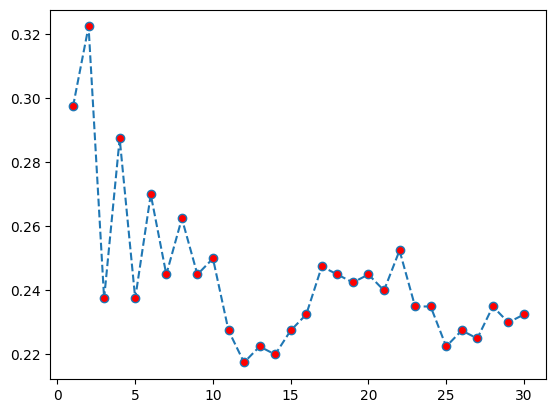

In [186]:
# finding the K value
error = []

for i in range(1,31,1):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    preds = knn.predict(Xtest)
    error.append(np.mean(preds!=ytest))

plt.plot(range(1,31,1), error, linestyle = 'dashed', marker ='o', mfc= 'red')
plt.show()

In [187]:
#Fit the training sets to the model.
#knn = KNeighborsClassifier(n_neighbors = 77, p=2, metric="euclidean")

knn = KNeighborsClassifier(n_neighbors = 2, p=2, metric='minkowski')
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [188]:
#knn_model = knn.predict(Xtest) 
print(f"Accuracy : {accuracy_score(ytest, knn.predict(Xtest))*100} %" )

Accuracy : 67.75 %


##### Predicting the test results and train result

In [189]:
knn_model = knn.predict(Xtest)
knn_modeltrain = knn.predict(Xtrain)
#knn.score(scaled_Xtest, ytest)
#accuracy_score(ytest, knn_model)
print(f"Test Accuracy : {accuracy_score(ytest, knn_model)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, knn_modeltrain)*100} %" )

Test Accuracy : 67.75 %
Train Accuracy : 83.46552776082977 %


#### 3. Naive Bayes
Naive Bayes is a simple "probabilistic classifiers" which based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (X) and it is useful for very large dataset. In this section, GaussionNB was imported from sklearn and Xtrain, ytrain were bring fitted into the model in order to do prediction.

In [190]:
from sklearn.naive_bayes import GaussianNB       # 1. choose model class
naive_model = GaussianNB()                     # 2. instantiate model

Fit the training sets to the model.

In [191]:
naive_model.fit(Xtrain, ytrain)                  # 3. fit model to data

GaussianNB()

##### Predict testing test and testing train

In [192]:
y_naive_model_model = naive_model.predict(Xtest)
y_naive_model_model_train = naive_model.predict(Xtrain)

In [193]:
from sklearn.metrics import accuracy_score
#accuracy_score(ytest, y_naive_model_model)
print(f"Test Accuracy : {accuracy_score(ytest, y_naive_model_model)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, y_naive_model_model_train)*100} %" )

Test Accuracy : 76.25 %
Train Accuracy : 79.86577181208054 %


#### 4. Support Vector Machine (SVM)

A linear SVM was chosen by using the SVC classifier to make prediction on Xtest dataset by fitting the Xtrain and ytrain datasets into the SVM model. Accuracy was calculated and displyed by using score syntax.


In [194]:
# Import necessary library
from sklearn.svm import SVC

# Create a linear SVM classifier
svm_model = SVC()

# Train classfier
svm_model.fit(Xtrain, ytrain)

# Take the model that was trained on the Xtrain data and apply it to the Xtest
y_pred_svm = svm_model.predict(Xtest)

# Calculation of accuracy Data Test
svmScore = svm_model.score(Xtest, ytest)
svmScoreTrain = svm_model.score(Xtrain,ytrain)

# Calculation of confusion matrix
svmMatrix = confusion_matrix(ytest, y_pred_svm)

# Print output
print(f"Test Accuracy : {svmScore*100} %")
print(f"Train Accuracy : {svmScoreTrain*100} %")

Test Accuracy : 74.0 %
Train Accuracy : 74.92373398413666 %


#### Tree Based (DT,RF,XGBoost)

#### 5. Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [196]:
y_dt_test = dt_model.predict(Xtest)
y_dt_train = dt_model.predict(Xtrain)

In [197]:
print(f"Test Accuracy : {accuracy_score(ytest, y_dt_test)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, y_dt_train)*100} %" )

Test Accuracy : 74.75 %
Train Accuracy : 100.0 %


#### 6. Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(Xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [199]:
y_rf_test = rf_clf.predict(Xtest)
y_rf_train = rf_clf.predict(Xtrain)

In [200]:
print(f"Test Accuracy : {accuracy_score(ytest, y_rf_test)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, y_rf_train)*100} %" )

Test Accuracy : 84.0 %
Train Accuracy : 100.0 %


#### 7. XGBoost

In [201]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(Xtrain, ytrain, early_stopping_rounds=100, eval_set=[(Xtrain, ytrain), (Xtest, ytest)], eval_metric='logloss', verbose=False)

C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [202]:
results_xgb = xgb_model.evals_result()
results_xgb

{'validation_0': OrderedDict([('logloss',
               [0.5471885419422857,
                0.4649115068073168,
                0.404129856803055,
                0.36178228112711563,
                0.3294148059281145,
                0.3057237444007957,
                0.2815836866393622,
                0.26419510106175975,
                0.24567964416658683,
                0.2366329725852203,
                0.22326069072007115,
                0.2108692429605201,
                0.2016524580262415,
                0.1965823689358601,
                0.19166340208041316,
                0.17903306892867893,
                0.17527329231782285,
                0.1718430434515026,
                0.16525712186616093,
                0.1586157107842794,
                0.15269668670393904,
                0.14859079193085764,
                0.1427478000082421,
                0.1379378425136954,
                0.13130820763514442,
                0.12905456780517374,
           

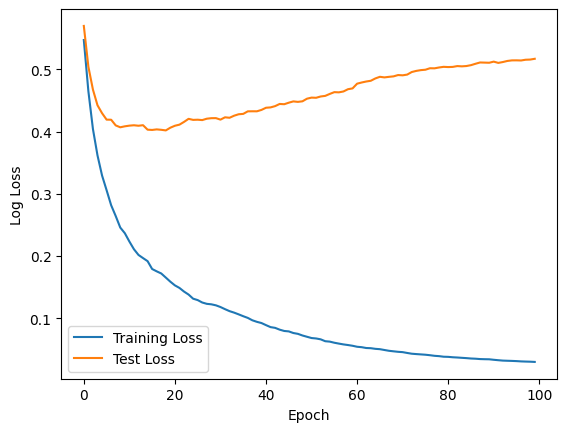

In [203]:
# plot the training and validation loss over time
train_loss = results_xgb['validation_0']['logloss']
test_loss = results_xgb['validation_1']['logloss']
epochs = len(train_loss)

plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [220]:
xgb_test = xgb_model.predict(Xtest)
xgb_train = xgb_model.predict(Xtrain)

In [221]:
print(f"Test Accuracy : {accuracy_score(ytest, xgb_test)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, xgb_train)*100} %" )

Test Accuracy : 84.25 %
Train Accuracy : 95.30201342281879 %


## E. Evaluation Model
The evaluation mathod used involving confusion metrix, precision-recall curve and also learning curve.
1. Learning Curve
2. Model Evaluation
3. Precision Recall Curve

### 1. Learning Curve

#### Function Learning Curve

In [204]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#### Learning Curves : Logistic Regression

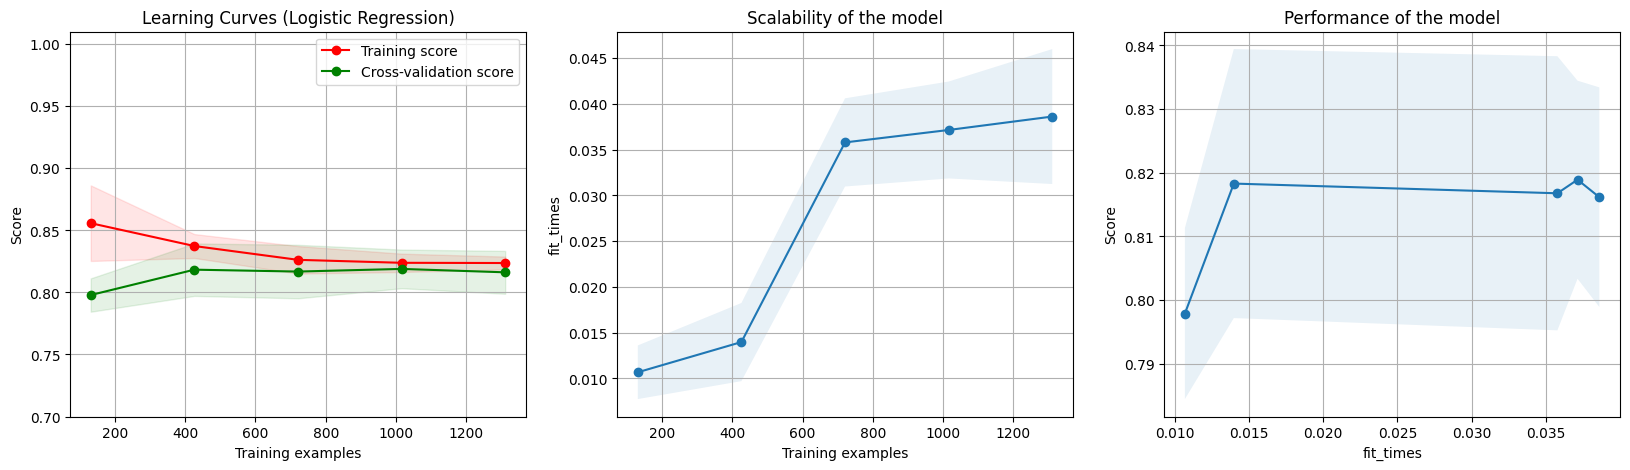

In [205]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(logistic_regression, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

#### Learning Curves : KNN

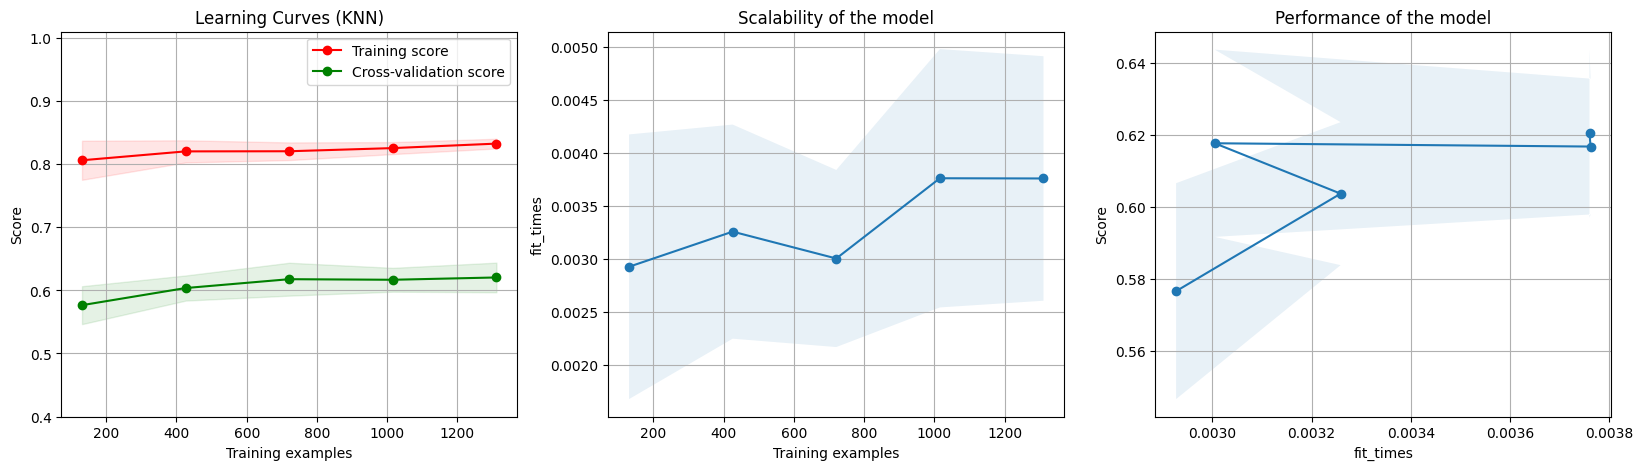

In [206]:
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(knn, title, Xtrain, ytrain,ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

#### Learning Curves : Naive Bayes

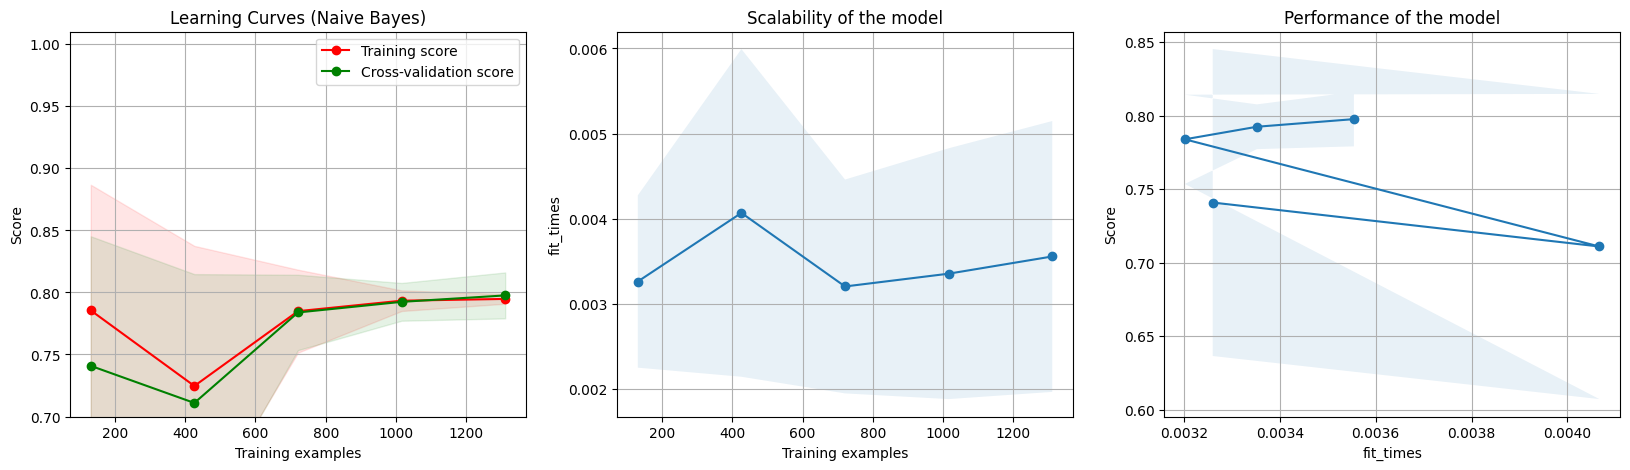

In [207]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(naive_model, title, Xtrain, ytrain,ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

#### Learning Curves : SVM

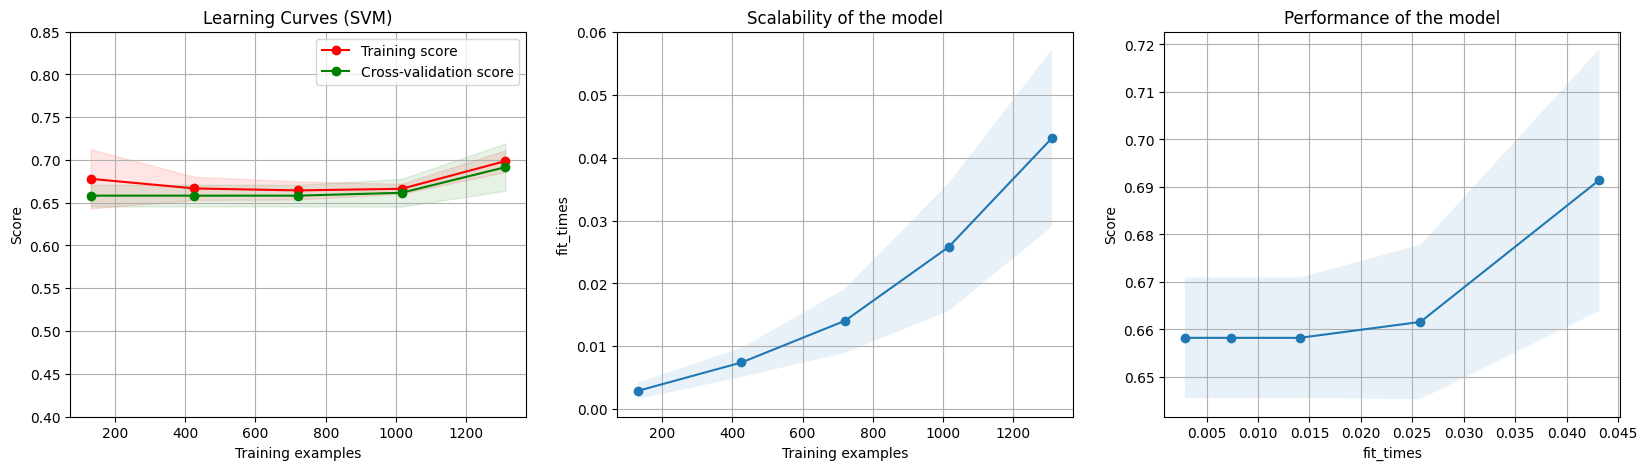

In [208]:
title = "Learning Curves (SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(svm_model, title, Xtrain, ytrain, ylim=(0.4, 0.85),
                    cv=cv, n_jobs=4)

plt.show()

#### Learning Curves : Decision Tree

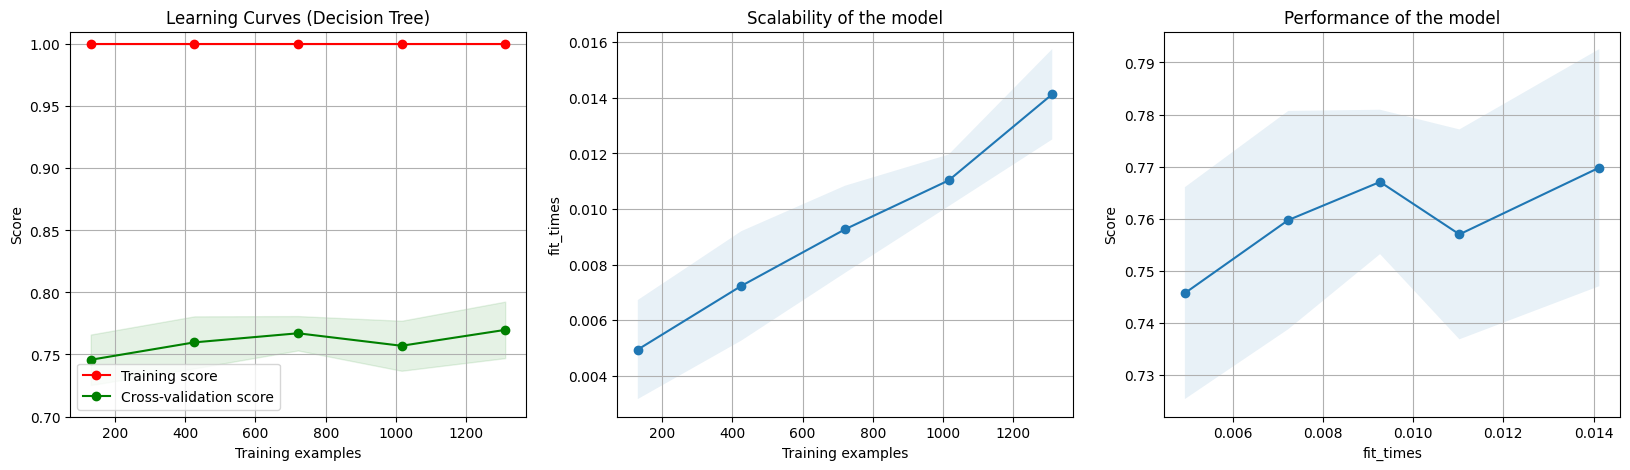

In [209]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(dt_model, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

#### Learning Curves : Random Forest

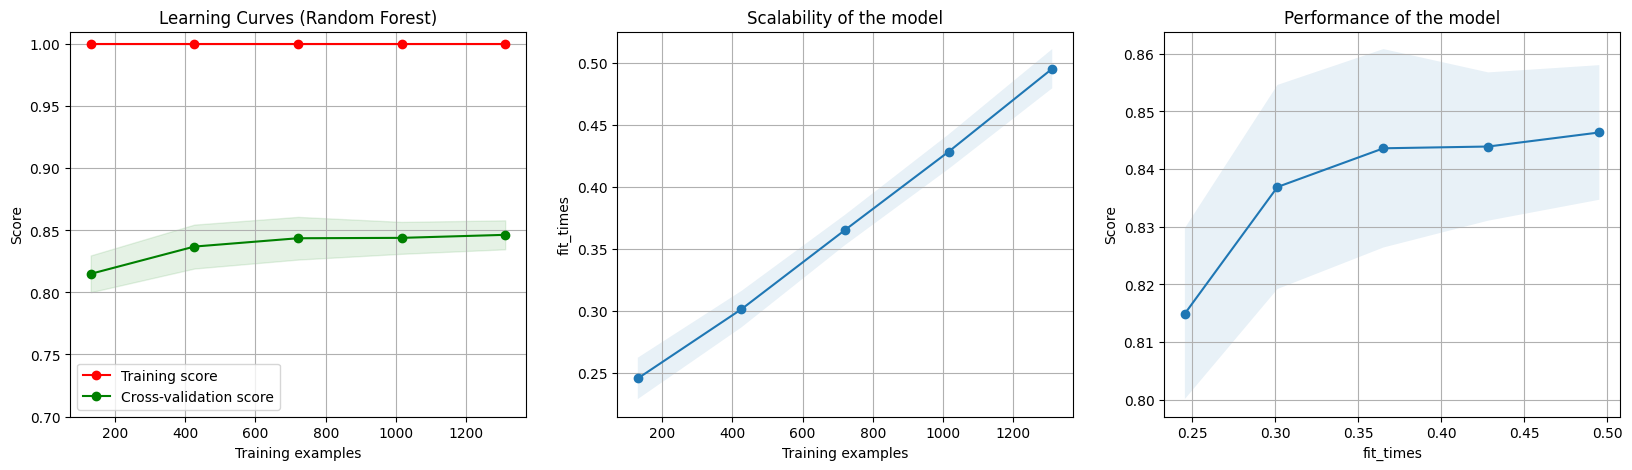

In [210]:
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

randomforest_model = RandomForestClassifier()
plot_learning_curve(randomforest_model, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

#### Learning Curves : XGBoost

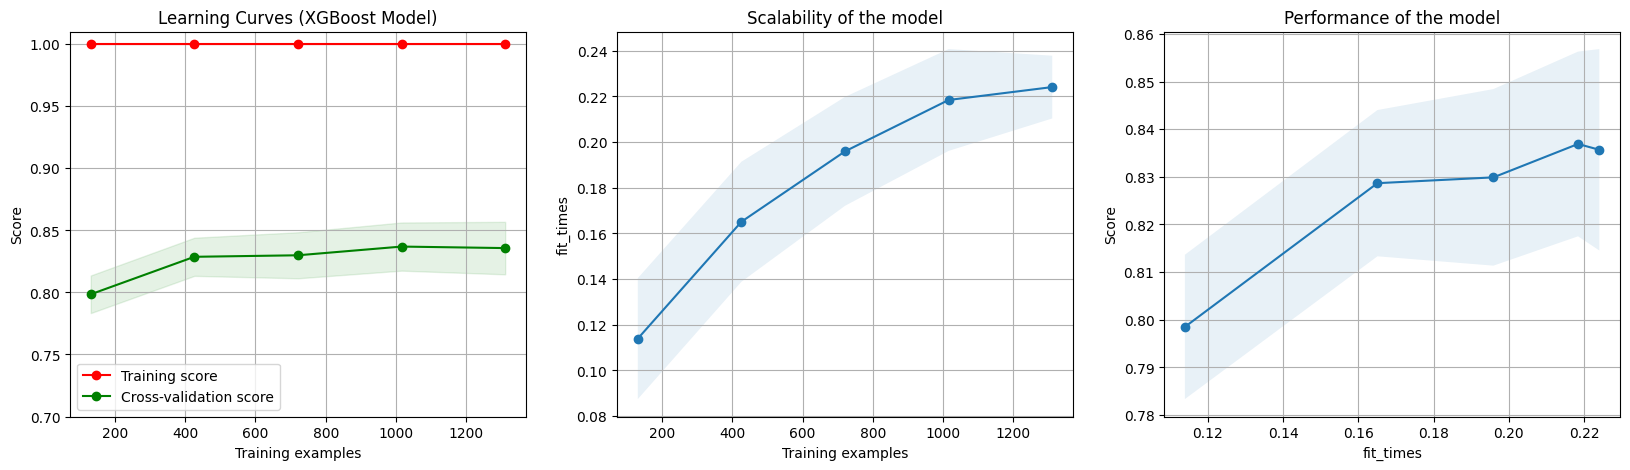

In [211]:
title = "Learning Curves (XGBoost Model)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #cross validation

plot_learning_curve(xgb_model, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

### 2. Model Evaluation

#### Model Evaluation Function

In [212]:
def res(y_test_valid,y_train_valid):
    cm_log = confusion_matrix(ytest,y_test_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(ytest,y_test_valid))
    print("======================Data Train Result Evaluation========================")
    print('train_accuracy:',accuracy_score(ytrain,y_train_valid))
    print('F1 score:', f1_score(ytrain,y_train_valid))
    print('Recall:', recall_score(ytrain,y_train_valid))
    print ('Precision:', precision_score(ytrain,y_train_valid))
    
    print("======================Data Test Result Evaluation========================")
    print('test_accuracy:',accuracy_score(ytest,y_test_valid))
    print('F1 score:', f1_score(ytest, y_test_valid))
    print('Recall:', recall_score(ytest,y_test_valid))
    print ('Precision:', precision_score(ytest,y_test_valid))
    #print ('Precision:', precision_score(ytest, model,pos_label=1))
    #print ('Accuracy:', accuracy_score(ytest, model))
    #print ('F1 score:', f1_score(ytest, model,pos_label=1))
    #print ('Recall:', recall_score(ytest, model,pos_label=1))
    #print ('\n clasification report:\n', classification_report(ytest,model,target_names=target_names))

In [213]:
def model_evaluation(model,name):
    
    confusion_matrix = pd.crosstab(ytest, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    target_names = ['No' , 'Yes']
    print ('Precision:', precision_score(ytest, model,pos_label=1))
    print ('Accuracy:', accuracy_score(ytest, model))
    print ('F1 score:', f1_score(ytest, model,pos_label=1))
    print ('Recall:', recall_score(ytest, model,pos_label=1))
    print ('\n clasification report:\n', classification_report(ytest,model,target_names=target_names))

In [214]:
def evaluate(model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    
    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred))    
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

#### Logistic Regression

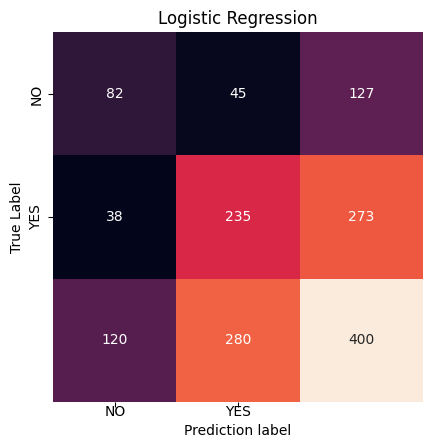

Precision: 0.8392857142857143
Accuracy: 0.7925
F1 score: 0.8499095840867992
Recall: 0.8608058608058609

 clasification report:
               precision    recall  f1-score   support

          No       0.68      0.65      0.66       127
         Yes       0.84      0.86      0.85       273

    accuracy                           0.79       400
   macro avg       0.76      0.75      0.76       400
weighted avg       0.79      0.79      0.79       400



In [215]:
lr_y_pred = logistic_regression.predict(Xtest)
model_evaluation(lr_y_pred,"Logistic Regression")

In [216]:
evaluate(logistic_regression, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       555
           1       0.85      0.89      0.87      1084

    accuracy                           0.82      1639
   macro avg       0.81      0.79      0.80      1639
weighted avg       0.82      0.82      0.82      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 970
True Negative: 379
False Positive: 176
False Negative: 114

Accuracy Data Train: 0.8230628431970713
Precision Data Train: 0.8464223385689355
Recall Data Train: 0.8948339483394834
F1-Score Data Train: 0.8699551569506727
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       127
           1       0.84      0.86      0.85       273

    accuracy                           0.79       400
   macro avg       0.76      0.75      0.76   

#### KNN

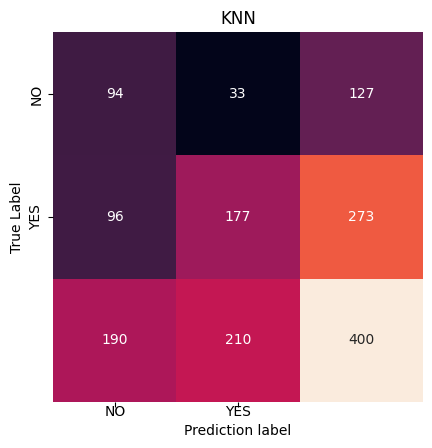

Precision: 0.8428571428571429
Accuracy: 0.6775
F1 score: 0.732919254658385
Recall: 0.6483516483516484

 clasification report:
               precision    recall  f1-score   support

          No       0.49      0.74      0.59       127
         Yes       0.84      0.65      0.73       273

    accuracy                           0.68       400
   macro avg       0.67      0.69      0.66       400
weighted avg       0.73      0.68      0.69       400



In [217]:
knn_y_pred = knn.predict(Xtest)
model_evaluation(knn_y_pred,"KNN")

In [218]:
evaluate(knn, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       555
           1       1.00      0.75      0.86      1084

    accuracy                           0.83      1639
   macro avg       0.84      0.88      0.83      1639
weighted avg       0.89      0.83      0.84      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 813
True Negative: 555
False Positive: 0
False Negative: 271

Accuracy Data Train: 0.8346552776082977
Precision Data Train: 1.0
Recall Data Train: 0.75
F1-Score Data Train: 0.8571428571428571
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.49      0.74      0.59       127
           1       0.84      0.65      0.73       273

    accuracy                           0.68       400
   macro avg       0.67      0.69      0.66       400
weighted avg       0.73

#### Naive Bayes

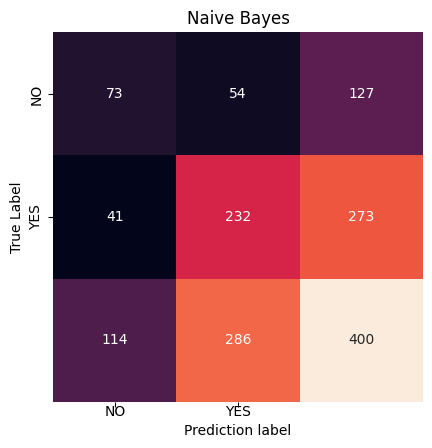

Precision: 0.8111888111888111
Accuracy: 0.7625
F1 score: 0.8300536672629696
Recall: 0.8498168498168498

 clasification report:
               precision    recall  f1-score   support

          No       0.64      0.57      0.61       127
         Yes       0.81      0.85      0.83       273

    accuracy                           0.76       400
   macro avg       0.73      0.71      0.72       400
weighted avg       0.76      0.76      0.76       400



In [219]:
nb_y_pred = naive_model.predict(Xtest)
model_evaluation(nb_y_pred,"Naive Bayes")

In [220]:
evaluate(naive_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       555
           1       0.82      0.89      0.85      1084

    accuracy                           0.80      1639
   macro avg       0.78      0.75      0.76      1639
weighted avg       0.79      0.80      0.79      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 969
True Negative: 340
False Positive: 215
False Negative: 115

Accuracy Data Train: 0.7986577181208053
Precision Data Train: 0.8184121621621622
Recall Data Train: 0.8939114391143912
F1-Score Data Train: 0.8544973544973545
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.64      0.57      0.61       127
           1       0.81      0.85      0.83       273

    accuracy                           0.76       400
   macro avg       0.73      0.71      0.72   

#### SVM

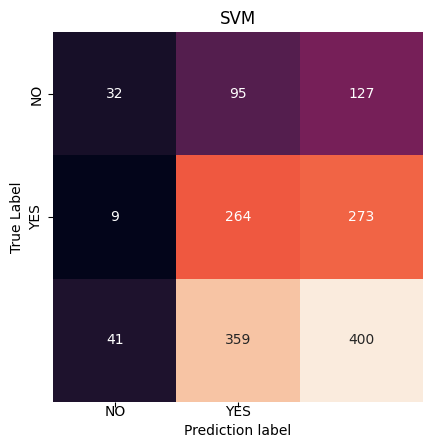

Precision: 0.7353760445682451
Accuracy: 0.74
F1 score: 0.8354430379746834
Recall: 0.967032967032967

 clasification report:
               precision    recall  f1-score   support

          No       0.78      0.25      0.38       127
         Yes       0.74      0.97      0.84       273

    accuracy                           0.74       400
   macro avg       0.76      0.61      0.61       400
weighted avg       0.75      0.74      0.69       400



In [221]:
svm_y_pred = svm_model.predict(Xtest)
model_evaluation(svm_y_pred,"SVM")

In [222]:
evaluate(svm_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.90      0.29      0.44       555
           1       0.73      0.98      0.84      1084

    accuracy                           0.75      1639
   macro avg       0.82      0.64      0.64      1639
weighted avg       0.79      0.75      0.70      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1066
True Negative: 162
False Positive: 393
False Negative: 18

Accuracy Data Train: 0.7492373398413666
Precision Data Train: 0.7306374228923921
Recall Data Train: 0.9833948339483395
F1-Score Data Train: 0.8383798662996461
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.78      0.25      0.38       127
           1       0.74      0.97      0.84       273

    accuracy                           0.74       400
   macro avg       0.76      0.61      0.61   

#### Decision Tree

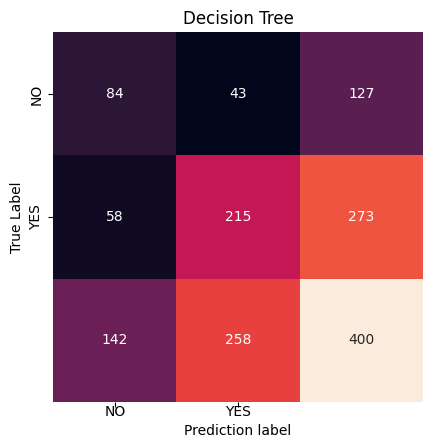

Precision: 0.8333333333333334
Accuracy: 0.7475
F1 score: 0.8097928436911488
Recall: 0.7875457875457875

 clasification report:
               precision    recall  f1-score   support

          No       0.59      0.66      0.62       127
         Yes       0.83      0.79      0.81       273

    accuracy                           0.75       400
   macro avg       0.71      0.72      0.72       400
weighted avg       0.76      0.75      0.75       400



In [223]:
dt_y_pred = dt_model.predict(Xtest)
model_evaluation(dt_y_pred,"Decision Tree")

In [224]:
evaluate(dt_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       555
           1       1.00      1.00      1.00      1084

    accuracy                           1.00      1639
   macro avg       1.00      1.00      1.00      1639
weighted avg       1.00      1.00      1.00      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1084
True Negative: 555
False Positive: 0
False Negative: 0

Accuracy Data Train: 1.0
Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.59      0.66      0.62       127
           1       0.83      0.79      0.81       273

    accuracy                           0.75       400
   macro avg       0.71      0.72      0.72       400
weighted avg       0.76      0.75      0.75       400



#### Random Forest

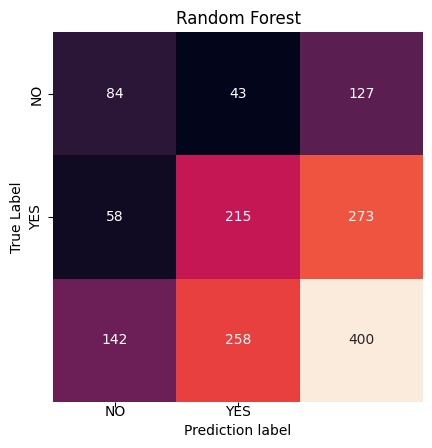

Precision: 0.8333333333333334
Accuracy: 0.7475
F1 score: 0.8097928436911488
Recall: 0.7875457875457875

 clasification report:
               precision    recall  f1-score   support

          No       0.59      0.66      0.62       127
         Yes       0.83      0.79      0.81       273

    accuracy                           0.75       400
   macro avg       0.71      0.72      0.72       400
weighted avg       0.76      0.75      0.75       400



In [225]:
dt_y_pred = dt_model.predict(Xtest)
model_evaluation(dt_y_pred,"Random Forest")

In [226]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier with desired hyperparameters
randomforest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model on the training data
randomforest_model.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=5, random_state=42)

In [227]:
evaluate(randomforest_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       555
           1       0.86      0.95      0.90      1084

    accuracy                           0.87      1639
   macro avg       0.87      0.82      0.84      1639
weighted avg       0.87      0.87      0.86      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1033
True Negative: 386
False Positive: 169
False Negative: 51

Accuracy Data Train: 0.8657718120805369
Precision Data Train: 0.8594009983361065
Recall Data Train: 0.9529520295202952
F1-Score Data Train: 0.9037620297462818
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.65      0.72       127
           1       0.85      0.93      0.89       273

    accuracy                           0.84       400
   macro avg       0.83      0.79      0.81   

#### XGBoost

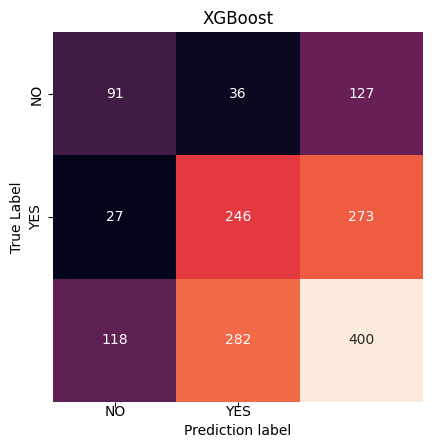

Precision: 0.8723404255319149
Accuracy: 0.8425
F1 score: 0.8864864864864866
Recall: 0.9010989010989011

 clasification report:
               precision    recall  f1-score   support

          No       0.77      0.72      0.74       127
         Yes       0.87      0.90      0.89       273

    accuracy                           0.84       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.84      0.84      0.84       400



In [228]:
xgb_y_pred = xgb_model.predict(Xtest)
model_evaluation(xgb_y_pred,"XGBoost")

In [229]:
evaluate(xgb_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       555
           1       0.95      0.98      0.96      1084

    accuracy                           0.95      1639
   macro avg       0.95      0.94      0.95      1639
weighted avg       0.95      0.95      0.95      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1060
True Negative: 502
False Positive: 53
False Negative: 24

Accuracy Data Train: 0.9530201342281879
Precision Data Train: 0.9523809523809523
Recall Data Train: 0.977859778597786
F1-Score Data Train: 0.9649522075557577
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       127
           1       0.87      0.90      0.89       273

    accuracy                           0.84       400
   macro avg       0.82      0.81      0.81     

## Conclusion 

The 3 best baseline models are: Logistic Regression, SVM, Naive Bayes

## F. Tuning Model

### Tuning Model with GridSearch

In [256]:
#Contoh pakai Stratified K-Fold (Optional)
# from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
# # Set the number of folds for StratifiedKFold
# n_splits = 5

# # Create a StratifiedKFold object
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# model_cv_scores = cross_val_score(nama_model, X, y, cv=skf)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Evaluate the model on the test data
# score = dtc.score(X_test, y_test)
# print(f"Score: {score:.4f}")

#### 1. Tuning Logistic Regression Model with GridSearch

In [257]:
#Cross Validation using ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #splitting dengan n = 10

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def tune_logistic_regression(Xtrain, ytrain, param_grid):
    # Create a logistic regression object
    logreg = LogisticRegression()

    # Create a grid search object with the specified parameter grid with shufflesplit cross validation
    grid_search = GridSearchCV(logreg, param_grid, cv=cv)

    # Fit the grid search to the training data
    grid_search.fit(Xtrain, ytrain)

    # Use the best estimator to make predictions on the test data
    y_pred = grid_search.predict(Xtest)

    # Calculate the accuracy score on the test data
    accuracy = accuracy_score(ytest, y_pred)

    # Print the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("Test accuracy:", accuracy)

    # Return the best estimator
    return grid_search.best_estimator_


In [259]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

best_logreg = tune_logistic_regression(Xtrain, ytrain, param_grid)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8192073170731706
Test accuracy: 0.795


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [260]:
best_logreg

LogisticRegression(C=10, penalty='l1', solver='liblinear')

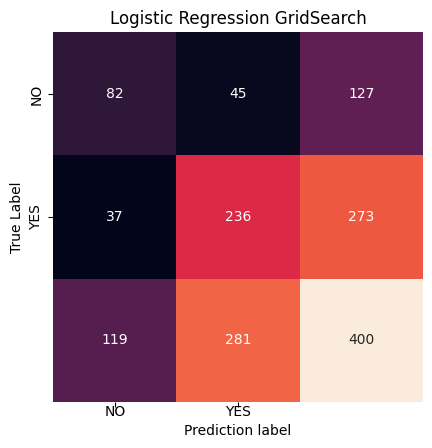

Precision: 0.8398576512455516
Accuracy: 0.795
F1 score: 0.851985559566787
Recall: 0.8644688644688645

 clasification report:
               precision    recall  f1-score   support

          No       0.69      0.65      0.67       127
         Yes       0.84      0.86      0.85       273

    accuracy                           0.80       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.79      0.80      0.79       400



In [294]:
model_evaluation(best_logreg.predict(Xtest),"Logistic Regression GridSearch")

In [262]:
evaluate(best_logreg, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       555
           1       0.85      0.89      0.87      1084

    accuracy                           0.83      1639
   macro avg       0.81      0.79      0.80      1639
weighted avg       0.82      0.83      0.82      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 970
True Negative: 383
False Positive: 172
False Negative: 114

Accuracy Data Train: 0.825503355704698
Precision Data Train: 0.8493870402802102
Recall Data Train: 0.8948339483394834
F1-Score Data Train: 0.87151841868823
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       127
           1       0.84      0.86      0.85       273

    accuracy                           0.80       400
   macro avg       0.76      0.76      0.76      

#### 2. Tuning SVM Model with GridSearch

In [263]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def tune_svm(Xtrain, ytrain, Xtest, ytest, cv=5):
    # Define the SVM model
    svm_model = SVC()

    # Define the hyperparameters to be tuned
    parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'C': [0.01, 0.1, 1, 10, 100],
                  'gamma': ['scale', 'auto']}

    # Define the GridSearchCV object with 5-fold cross-validation
    svm_grid = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=cv)

    # Fit the GridSearchCV object to the training data
    svm_grid.fit(Xtrain, ytrain)

    # Get the best parameters and score
    best_params = svm_grid.best_params_
    best_score = svm_grid.best_score_

    # Predict on the test data using the best model
    y_pred = svm_grid.predict(Xtest)

    # Calculate the accuracy score on the test data
    accuracy = accuracy_score(ytest, y_pred)

    # Print the best parameters, best score, and test accuracy score
    print("Best parameters:", best_params)
    print("Best score:", best_score)
    print("Test accuracy:", accuracy)

    # Return the best model
    return svm_grid.best_estimator_

In [264]:
best_svm_model = SVC(C= 0.1, gamma= 'scale', kernel= 'linear') 

In [265]:
best_svm_model.fit(Xtrain, ytrain)

SVC(C=0.1, kernel='linear')

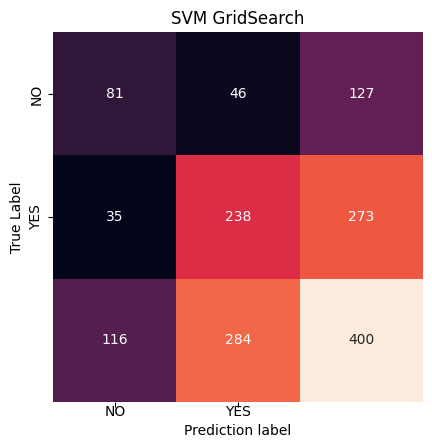

Precision: 0.8380281690140845
Accuracy: 0.7975
F1 score: 0.8545780969479354
Recall: 0.8717948717948718

 clasification report:
               precision    recall  f1-score   support

          No       0.70      0.64      0.67       127
         Yes       0.84      0.87      0.85       273

    accuracy                           0.80       400
   macro avg       0.77      0.75      0.76       400
weighted avg       0.79      0.80      0.79       400



In [295]:
model_evaluation(best_svm_model.predict(Xtest),"SVM GridSearch")

In [267]:
evaluate(best_svm_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.78      0.68      0.72       555
           1       0.85      0.90      0.87      1084

    accuracy                           0.82      1639
   macro avg       0.81      0.79      0.80      1639
weighted avg       0.82      0.82      0.82      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 975
True Negative: 377
False Positive: 178
False Negative: 109

Accuracy Data Train: 0.8248932275777914
Precision Data Train: 0.8456201214223764
Recall Data Train: 0.8994464944649446
F1-Score Data Train: 0.8717031738936075
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       127
           1       0.84      0.87      0.85       273

    accuracy                           0.80       400
   macro avg       0.77      0.75      0.76   

#### 3. Tuning Naive Bayes Model with GridSearch

In [268]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

def tune_nb(Xtrain, ytrain, Xtest, ytest):
    # Define the Naive Bayes model
    nb_model = GaussianNB()

    # Define the hyperparameters to be tuned
    parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

    # Define the GridSearchCV object with 5-fold cross-validation
    nb_grid = GridSearchCV(estimator=nb_model, param_grid=parameters, cv=cv)

    # Fit the GridSearchCV object to the training data
    nb_grid.fit(Xtrain, ytrain)

    # Get the best parameters and score
    best_params = nb_grid.best_params_
    best_score = nb_grid.best_score_

    # Predict on the test data using the best model
    y_pred = nb_grid.predict(Xtest)

    # Calculate the accuracy score on the test data
    accuracy = accuracy_score(ytest, y_pred)

    # Print the best parameters, best score, and test accuracy score
    print("Best parameters:", best_params)
    print("Best score:", best_score)
    print("Test accuracy:", accuracy)

    # Return the best model
    return nb_grid.best_estimator_


In [269]:
# Assuming you have already loaded the training and test data into Xtrain, ytrain, Xtest, and ytest

# Call the tune_nb function
best_nb_model = tune_nb(Xtrain, ytrain, Xtest, ytest)

Best parameters: {'var_smoothing': 1e-05}
Best score: 0.7987804878048781
Test accuracy: 0.7675


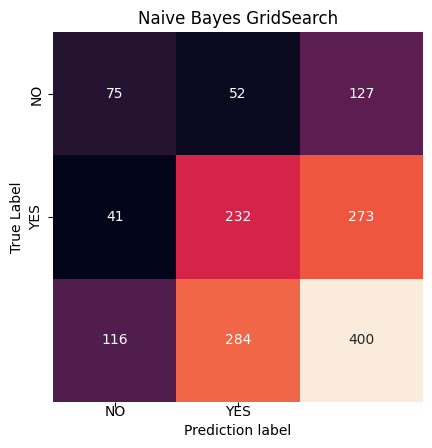

Precision: 0.8169014084507042
Accuracy: 0.7675
F1 score: 0.8330341113105926
Recall: 0.8498168498168498

 clasification report:
               precision    recall  f1-score   support

          No       0.65      0.59      0.62       127
         Yes       0.82      0.85      0.83       273

    accuracy                           0.77       400
   macro avg       0.73      0.72      0.73       400
weighted avg       0.76      0.77      0.76       400

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.74      0.62      0.68       555
           1       0.82      0.89      0.85      1084

    accuracy                           0.80      1639
   macro avg       0.78      0.75      0.76      1639
weighted avg       0.79      0.80      0.79      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 960
True Negative: 346
False Positive: 209
False Negative: 124

Accuracy Data Train:

In [296]:
model_evaluation(best_nb_model.predict(Xtest),"Naive Bayes GridSearch")
evaluate(best_nb_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

### Tuning Model with RandomSearch

#### 1. Tuning Logistic Regression Model with RandomSearch

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

def tune_logistic_regression_random(Xtrain, ytrain, param_dist):
    # Create a logistic regression object
    logreg = LogisticRegression()

    # Create a randomized search object with the specified parameter distribution
    random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, cv=cv)

    # Fit the randomized search to the training data
    random_search.fit(Xtrain, ytrain)

    # Use the best estimator to make predictions on the test data
    y_pred = random_search.predict(Xtest)

    # Calculate the accuracy score on the test data
    accuracy = accuracy_score(ytest, y_pred)

    # Print the best parameters and best score
    print("Best Parameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)
    print("Test accuracy:", accuracy)

    # Return the best estimator
    return random_search.best_estimator_


In [272]:
from scipy.stats import uniform

param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0, 10),
    'solver': ['liblinear', 'saga']
}

rs_best_logreg = tune_logistic_regression_random(Xtrain, ytrain, param_dist)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Best Parameters: {'C': 5.270989839795651, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8192073170731706
Test accuracy: 0.795


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


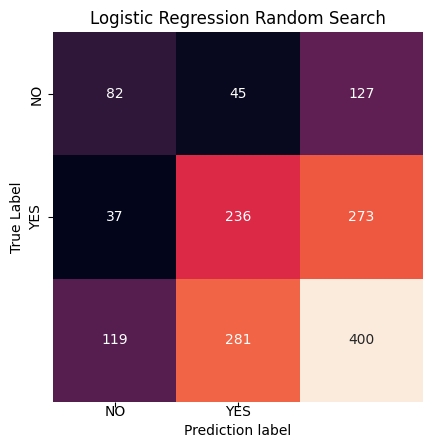

Precision: 0.8398576512455516
Accuracy: 0.795
F1 score: 0.851985559566787
Recall: 0.8644688644688645

 clasification report:
               precision    recall  f1-score   support

          No       0.69      0.65      0.67       127
         Yes       0.84      0.86      0.85       273

    accuracy                           0.80       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.79      0.80      0.79       400



In [273]:
model_evaluation(rs_best_logreg.predict(Xtest),"Logistic Regression Random Search")

In [274]:
evaluate(rs_best_logreg, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       555
           1       0.85      0.89      0.87      1084

    accuracy                           0.83      1639
   macro avg       0.81      0.79      0.80      1639
weighted avg       0.82      0.83      0.82      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 970
True Negative: 383
False Positive: 172
False Negative: 114

Accuracy Data Train: 0.825503355704698
Precision Data Train: 0.8493870402802102
Recall Data Train: 0.8948339483394834
F1-Score Data Train: 0.87151841868823
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       127
           1       0.84      0.86      0.85       273

    accuracy                           0.80       400
   macro avg       0.76      0.76      0.76      

#### 2. Tuning SVM Model with RandomSearch

In [275]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

def tune_svm_random(Xtrain, ytrain, param_dist):
    # Create an SVM object
    svm = SVC()

    # Create a randomized search object with the specified parameter distribution
    random_search = RandomizedSearchCV(svm, param_distributions=param_dist, cv=cv)

    # Fit the randomized search to the training data
    random_search.fit(Xtrain, ytrain)

    # Use the best estimator to make predictions on the test data
    y_pred = random_search.predict(Xtest)

    # Calculate the accuracy score on the test data
    accuracy = accuracy_score(ytest, y_pred)

    # Print the best parameters and best score
    print("Best Parameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)
    print("Test accuracy:", accuracy)

    # Return the best estimator
    return random_search.best_estimator_


In [276]:
rs_best_svm_model = SVC(C= 0.36524887037243103,degree=3, gamma= 'scale', kernel= 'linear')
rs_best_svm_model.fit(Xtrain, ytrain) 

SVC(C=0.36524887037243103, kernel='linear')

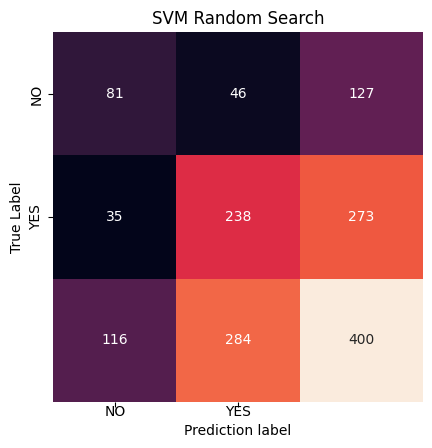

Precision: 0.8380281690140845
Accuracy: 0.7975
F1 score: 0.8545780969479354
Recall: 0.8717948717948718

 clasification report:
               precision    recall  f1-score   support

          No       0.70      0.64      0.67       127
         Yes       0.84      0.87      0.85       273

    accuracy                           0.80       400
   macro avg       0.77      0.75      0.76       400
weighted avg       0.79      0.80      0.79       400

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.78      0.68      0.72       555
           1       0.85      0.90      0.87      1084

    accuracy                           0.83      1639
   macro avg       0.81      0.79      0.80      1639
weighted avg       0.82      0.83      0.82      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 976
True Negative: 377
False Positive: 178
False Negative: 108

Accuracy Data Train:

In [297]:
model_evaluation(rs_best_svm_model.predict(Xtest),"SVM Random Search")
evaluate(rs_best_svm_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

#### 3. Tuning Naive Bayes Model with RandomSearch

In [280]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

def tune_nb_random(Xtrain, ytrain, param_dist):
    # Create a Gaussian Naive Bayes object
    nb = GaussianNB()

    # Create a randomized search object with the specified parameter distribution
    random_search = RandomizedSearchCV(nb, param_distributions=param_dist, cv=cv)

    # Fit the randomized search to the training data
    random_search.fit(Xtrain, ytrain)

    # Use the best estimator to make predictions on the test data
    y_pred = random_search.predict(Xtest)

    # Calculate the accuracy score on the test data
    accuracy = accuracy_score(ytest, y_pred)

    # Print the best parameters and best score
    print("Best Parameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)
    print("Test accuracy:", accuracy)

    # Return the best estimator
    return random_search.best_estimator_


In [281]:
param_dist = {
    'var_smoothing': uniform(1e-10, 1e-8)
}

rs_best_nb = tune_nb_random(Xtrain, ytrain, param_dist)

Best Parameters: {'var_smoothing': 3.2085347581103373e-09}
Best Score: 0.7975609756097561
Test accuracy: 0.7625


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       555
           1       0.82      0.89      0.85      1084

    accuracy                           0.80      1639
   macro avg       0.78      0.75      0.76      1639
weighted avg       0.79      0.80      0.79      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 969
True Negative: 340
False Positive: 215
False Negative: 115

Accuracy Data Train: 0.7986577181208053
Precision Data Train: 0.8184121621621622
Recall Data Train: 0.8939114391143912
F1-Score Data Train: 0.8544973544973545
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.64      0.57      0.61       127
           1       0.81      0.85      0.83       273

    accuracy                           0.76       400
   macro avg       0.73      0.71      0.72   

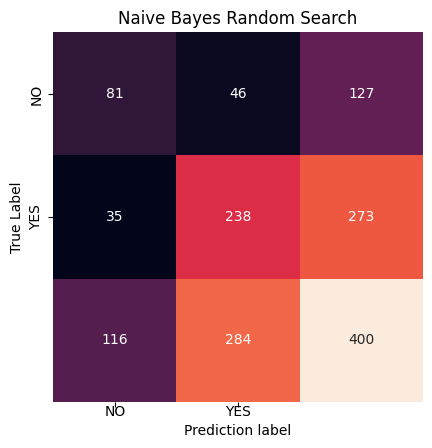

Precision: 0.8380281690140845
Accuracy: 0.7975
F1 score: 0.8545780969479354
Recall: 0.8717948717948718

 clasification report:
               precision    recall  f1-score   support

          No       0.70      0.64      0.67       127
         Yes       0.84      0.87      0.85       273

    accuracy                           0.80       400
   macro avg       0.77      0.75      0.76       400
weighted avg       0.79      0.80      0.79       400



In [282]:
evaluate(rs_best_nb, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)
model_evaluation(rs_best_svm_model.predict(Xtest),"Naive Bayes Random Search")

### Feature Importance using Dalex

In [284]:
# import dalex to explain complex model
%pip install dalex
import dalex as dx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046022 sha256=2e309550dff95f35c23ede7ff89da2aa0aa8bee0909ac61080128b0b7b72a2b2
  Stored in directory: /root/.cache/pip/wheels/3e/dc/80/530757389f7587f2b1cd02e5a0a11dd986b232b06eacebcf8d
Successfully built dalex


In [285]:
## initiate explainer for the best model
deposito_exp = dx.Explainer(rs_best_logreg, Xtrain, ytrain, label = "Logistics Regression Interpretation")

Preparation of a new explainer is initiated

  -> data              : 1639 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1639 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistics Regression Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ff26413eb80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0168, mean = 0.661, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.993, mean = -8.87e-05, max = 0.942
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [286]:
# visualize permutation feature importance for the best model
deposito_exp.model_parts().plot()

In [287]:
# create partial dependence plot of LogReg model
deposito_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 16/16 [00:00<00:00, 30.78it/s]


## Results Learning Curve After Tunning Random Search

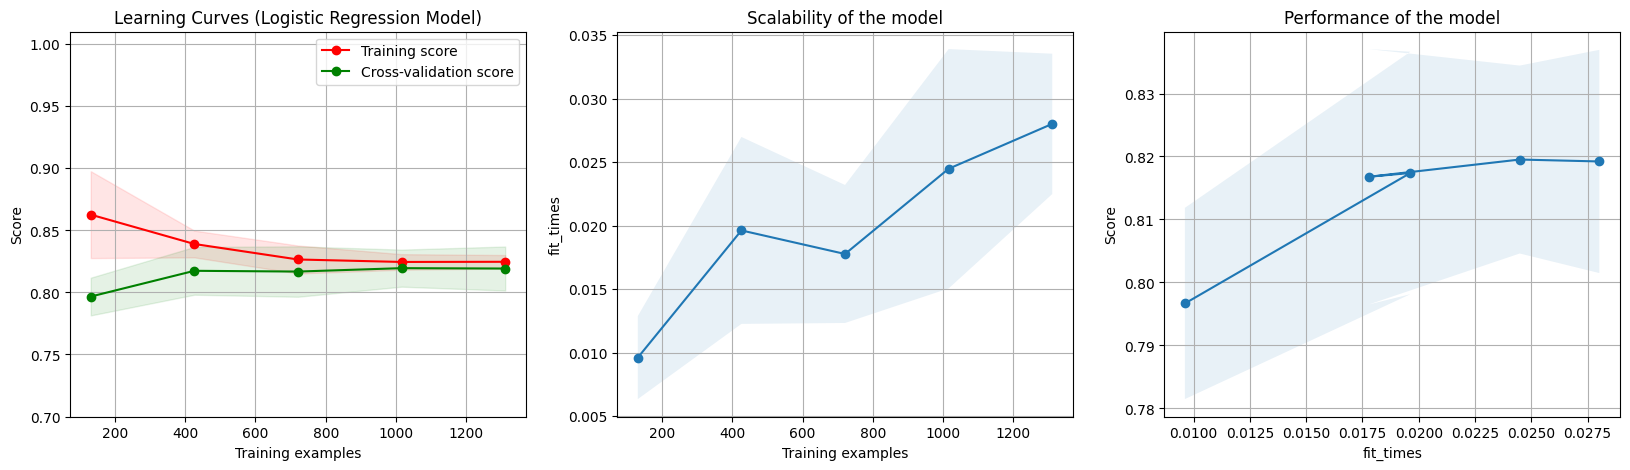

In [288]:
title = "Learning Curves (Logistic Regression Model)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #cross validation

plot_learning_curve(rs_best_logreg, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

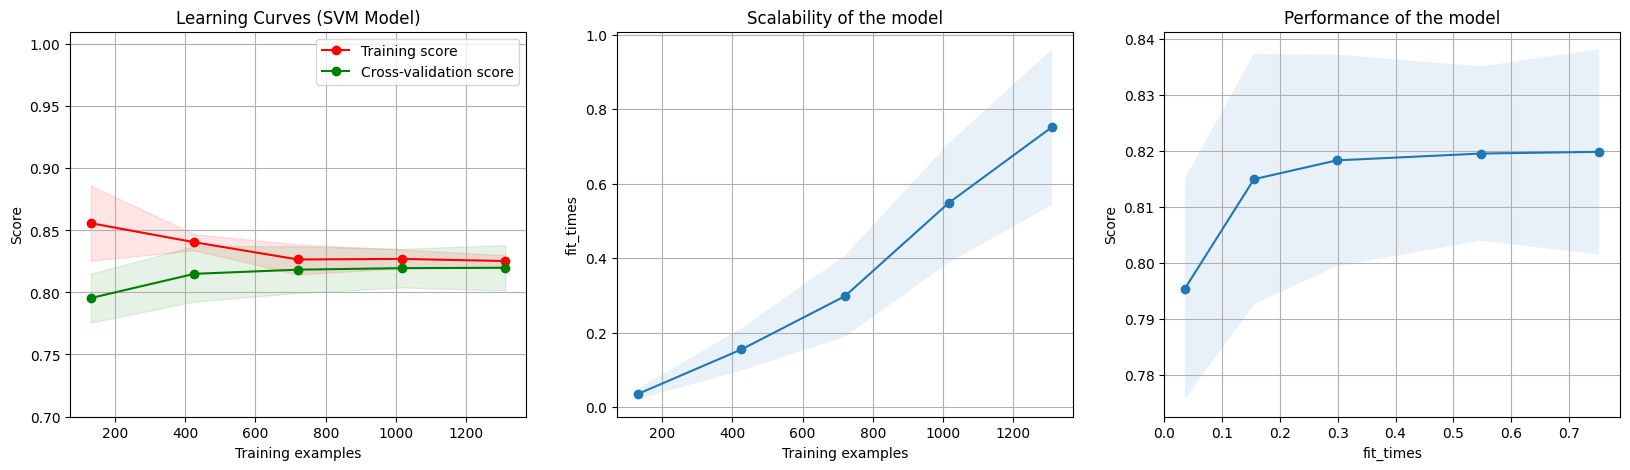

In [289]:
title = "Learning Curves (SVM Model)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #cross validation

plot_learning_curve(rs_best_svm_model, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

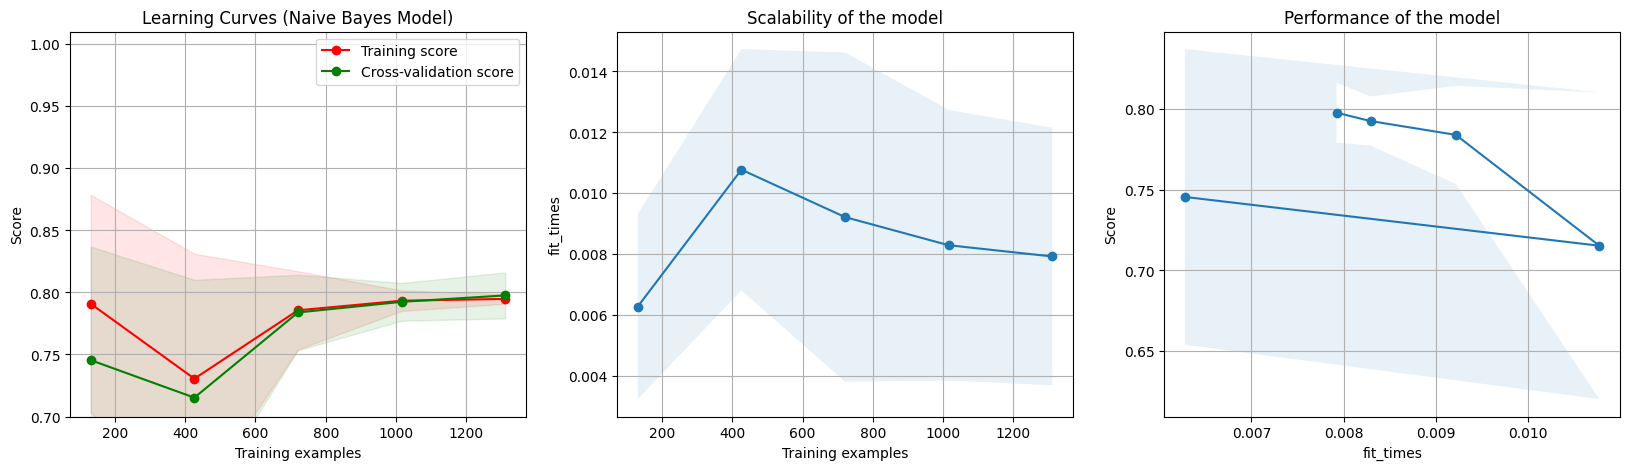

In [293]:
title = "Learning Curves (Naive Bayes Model)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #cross validation

plot_learning_curve(rs_best_nb, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

### Business Case

In [230]:
!pip install scikit-plot

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

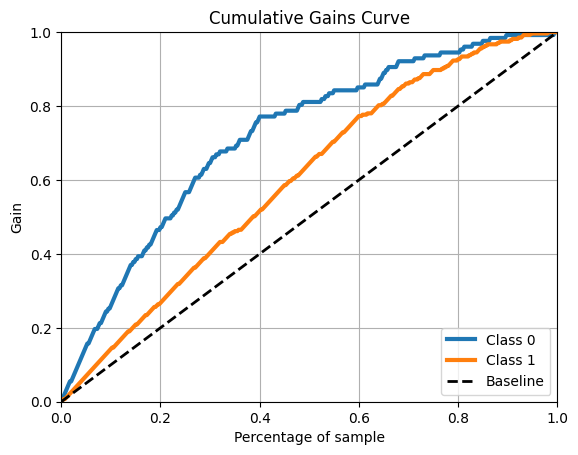

In [231]:
# load scikitplot untuk visualisasi metrik
### logistic_regression -> diambil yang paling best model
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(ytest, logistic_regression.predict_proba(Xtest))
#plot_cumulative_gain(y_actual, y_prediksi)

In [232]:
from sklearn.metrics import confusion_matrix
def evaluate_model(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    print('TN :',tn)
    print('TP :',tp)
    print('FN :',fn)
    print('FP :',fp)

In [233]:
evaluate_model(ytest, logistic_regression.predict(Xtest))

TN : 82
TP : 235
FN : 38
FP : 45


### Cara Menghitung Bunga Deposito Bank 50 Juta
#### Asumsi :
1. (setoran x suku bunga x 80% x 30 hari) : 365 hari = Total bunga
2. bank itu mendapat 20% dari suku bunga sebagai keuntungan untuk bank, tapi pada faktanya bank itu mengambil keuntungan dari hasil perputaran uang juga sehingga keuntungannya bisa lebih besar dari 20% hitungan diatas. Sebagai contoh misal bank meminjam kan uang ke perusahaan A dengan bunga 6% per bulan pada kasus KUR dengan asumsi perusahaan hanya hutang 1x, artinya 2% ini ialah keuntungan bank + 20% hitungan dari deposito.

### Menghitung dari TP dan FP Dulu :
TP dan FP -> hasil prediksinya 1 (positif)
TP Total orang : 235 orang
FP Total orang : 45 orang
Sehingga total prediksi nasabah ialah = 280 orang
sampling = 280 * 20 % = 56 orang
Pengambilan Acak : 20%
Pengambilan ML : 30%
biaya marketing : 0,5$ / orang tiap bulan -> 6$ per tahun (asumsi)
Dari 56 orang itu dia mengambil deposito = 235/(235+45) * 56 = 47 orang ambil deposito (dari persentase rasio di TP)
dari rasio persentase FP (tidak mengambil deposito) = 56-47 = 9 orang tidak ambil deposito
50jt naruh di deposito per orang : Bunga deposito Bank per bulan: 1.9 % x Rp 50.000.000 x 30 x 20% / 365 = Rp 15.600 * 12 bulan = Rp. 187400 * 47 = Rp 8.807.671
Biaya per orang 6$ per tahun = Rp 90000 * 56 = Rp 5.040.000
Untung bank setahun dari deposito ialah = Rp 8.807.671 - Rp 5.040.000 = Rp 3.767.671 -> untuk deposito 47 orang dari 56 orang per 1 tahun.

### KUR
misal ada UMKM Baru menerima KUR pertama kali, bunganya sebesar 6% efektif per tahun. Taruhlah semua UMKM mengambil KUR dengan nilai Rp. 50.000.000 per orang (1 orang = 1 UMKM) untuk 47 orang atau 47 UMKM.
misal untuk 1 UMKM keuntungan KUR untuk bank ialah 6% per tahun dengan cicilan selama 5 tahun sehingga :
6% / tahun x Rp. 50.000.000 x 5 tahun = Rp. 15.000.000 per 1 orang ( per UMKM ). Maka untuk 47 UMKM x Rp. 15.000.000 / UMKM = Rp. 705.000.000

Sehingga keuntungan total ialah = Rp. 705.000.000 + Rp. 3.767.671 = Rp. 708.767.671 * 30% (performa ML) = Rp. 212.630.301

Dengan performa pengambilan acak maka diperoleh dari cara yang sama seperti diatas tapi dikali 20% = Rp. 708.767.671 * 20%  = Rp. 141.753.534 (performa acak atau performa baseline)
##### Notes : performa baseline ini bukan performa baseline ML melainkan pengambilan acak dari suatu data.

Selisih dengan menggunakan model dan tanpa model = Rp. 212.630.301 - Rp. 141.753.534 = Rp. 70.876.767 

### Referensi :
1. https://www.bankmandiri.co.id/kredit-usaha-rakyat-2023
2. https://www.lamudi.co.id/journal/cara-menghitung-bunga-deposito/